<a href="https://colab.research.google.com/github/vuchicago/Python/blob/master/MSA_Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
####MOUNT DRIVE
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
###################### INSTALL TENSORFLOW 2.0 ##############################
!pip install tensorflow==2.0.0b1


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [0]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt

base_dir="/content/gdrive/My Drive/Python/MSA_Invest"
msa_dir=os.path.join(base_dir,"CAGDP11")
grad_boost_img=os.path.join(base_dir,"Gradient_boost_img")
os.chdir(base_dir)
PCA="PCA_Winter_2019-20_State_Forecast.xlsx"

PCA_sheet=pd.ExcelFile(PCA)
PCA_sheet.sheet_names ##List of all the sheets within excel file


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

['Output',
 'Res',
 'West North Central',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'East North Central',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'East South Central',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'Middle Atlantic',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'Pacific',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'South Atlantic',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'West South Central',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
sheet_keep=[
 'Iowa',
 'Kansas',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'South Dakota',
 'Illinois',
 'Indiana',
 'Michigan',
 'Ohio',
 'Wisconsin',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Tennessee',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Mountain',
 'Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'New England',
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'California',
 'Hawaii',
 'Oregon',
 'Washington',
 'Delaware',
 'Florida',
 'Georgia',
 'District of Columbia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Arkansas',
 'Louisiana',
 'Oklahoma',
 'Texas']

In [0]:
idx=0
df_pca=pd.DataFrame()
for states in sheet_keep:
  df=pd.read_excel(PCA,sheet_name=states,header=1)
  keep_indices=[4,7,11,18,21,29,32,36,40,48,51,53,56,61,62,63]
  df=df.iloc[keep_indices,:]
  df=df.T
  df=df.rename(columns=df.iloc[0]).drop(df.index[0])
  df.insert(loc=idx, column='State', value=states)
  df=df.rename(columns={"States":"State","- Unemployment Rate":"Unemployment Rate","Total Portland Cement ":"Total Portland Cement","Cement Per Capita ":"Cement Per Capita"})
  df_pca=pd.concat([df_pca,df],axis=0,sort=True)

df_pca.head()

,"- Unemployment Rate, %",Agricultural Cement,Cement Intensity (MT/Mil$2009),Cement Per Capita,Cement Per GSP (MT/Mil$2005),Cement Per GSP (MT/Mil$2009),Commercial Cement Consumption,Commercial Construction Spending,Government Cement Consumption,"Gross State Product, Real ($2012, Millions)",Multi Family Permits,Public Construction Spending,Residential Cement Consumption,Residential Construction Spending,Single Family Permits,State,Total Construction Spending,Total Portland Cement,Unemployment Rate (%)
2000,NaN,147149,170.111,0.583462,NaN,NaN,286708,2986.62,995607,NaN,3742,3387.69,279535,3672.05,8584,Iowa,10046.4,1709000,NaN
2001,NaN,79004.8,169.876,0.578805,NaN,14.0638,345686,2916.43,1.02574e+06,120669,3556,3566.85,246622,3506.69,8954,Iowa,9989.97,1697055,0.0333213
2002,NaN,115873,169.791,0.591298,NaN,13.9811,337662,2798.4,997178,124097,4344,3645.36,284295,3774.73,9927,Iowa,10218.5,1.73501e+06,0.0399316
2003,NaN,185728,126.998,0.569953,NaN,12.9666,189515,2685.79,1.0148e+06,129316,3737,6468.3,327325,4049.27,12851,Iowa,13203.4,1.6768e+06,0.0449228
2004,NaN,182451,107.602,0.623814,NaN,13.1845,133602,2565.66,1.15747e+06,139749,3220,9986.33,368999,4571.51,12235,Iowa,17123.5,1.84252e+06,0.0449686


In [0]:
BED="CAGDP11__ALL_AREAS_2002_2018.csv"
df_bed=pd.read_csv(BED, encoding='latin-1')
column_keep=["GeoName","Description_fixed", "2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017',"2018"]
df_bed=df_bed[column_keep][pd.notna(df_bed["GeoName"])] ##get rid of NA's from geoname column
df_bed.head()

,GeoName,Description_fixed,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Autauga, AL",All industry total (percent change),2.2,1.1,14.5,-0.3,7.6,2,-9.8,2.9,5.5,9.1,12.5,-4.8,-0.4,8,0.5,-6.8,4.3
1,"Autauga, AL",Private industries,0.91,0.28,13.07,-0.31,6.51,1.4,-8.56,0.87,6,8.96,11.94,-5.28,-1.25,6.82,1.39,-6.13,4.5
2,"Autauga, AL","Agriculture, forestry, fishing and hunting",-0.36,1.78,0.88,0.69,0.75,-1.41,-1.82,0.65,-0.52,0.34,-1.05,0.42,-0.99,0.23,-0.13,0.13,0.12
3,"Autauga, AL","Mining, quarrying, and oil and gas extraction",-0.07,0.03,0.1,0.08,0.18,0.07,-0.08,-0.17,0.09,-0.13,0.19,0.39,0.06,0.14,0.19,-0.04,0.69
4,"Autauga, AL",Utilities,3.25,0.37,3.93,-1.88,3.89,1.62,-1.88,2.26,6.67,7.82,11.65,-5.43,-1.92,5.56,0.59,-5.33,1.34


In [0]:
df_bed=df_bed.melt(["GeoName","Description_fixed"],var_name="Year",value_name="Value") ###Turns dataset into a flat file.  Each year column (2002-2018) unpivots into 1 column named 'Year'
df_bed.head()


,GeoName,Description_fixed,Year,Value
0,"Autauga, AL",All industry total (percent change),2002,2.2
1,"Autauga, AL",Private industries,2002,0.91
2,"Autauga, AL","Agriculture, forestry, fishing and hunting",2002,-0.36
3,"Autauga, AL","Mining, quarrying, and oil and gas extraction",2002,-0.07
4,"Autauga, AL",Utilities,2002,3.25


In [0]:
df_bed_piv=pd.pivot_table(df_bed,index=["GeoName","Year"],columns="Description_fixed",values="Value",aggfunc=np.sum) #Re-pivots data where the description columns creates multiple columns bbased on grouping
df_bed_piv.head()

Description_fixed  Accommodation and food services  ... Wholesale trade
GeoName       Year                                  ...                
Abbeville, SC 2002                           -0.01  ...           -0.22
              2003                           -0.19  ...             (D)
              2004                            0.12  ...           -0.04
              2005                           -0.13  ...             (D)
              2006                           -0.09  ...           -0.11

[5 rows x 34 columns]

In [0]:
df_bed_piv.to_csv("df_bed_piv.csv")
df_pca.to_csv("df_pca.csv")


In [0]:
####################################################################################
import pandas as pd
import numpy as np


df_bed_draft=pd.read_csv("df_bed_piv.csv")
df_bed_draft["State"]=df_bed_draft["GeoName"].str[-2:]
df_bed_draft.head()

,Unnamed: 0,GeoName,Year,Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting",All industry total (percent change),"Arts, entertainment, and recreation","Arts, entertainment, recreation, accommodation, and food services",Construction,Durable goods manufacturing,Educational services,"Educational services, health care, and social assistance",Finance and insurance,"Finance, insurance, real estate, rental, and leasing",Government and government enterprises,Health care and social assistance,Information,Management of companies and enterprises,Manufacturing,Manufacturing and information,"Mining, quarrying, and oil and gas extraction",Natural resources and mining,Nondurable goods manufacturing,Other services (except government and government enterprises),Private goods-producing industries 2/,Private industries,Private services-providing industries 3/,Professional and business services,"Professional, scientific, and technical services",Real estate and rental and leasing,Retail trade,Trade,Transportation and utilities,Transportation and warehousing,Utilities,Wholesale trade,State
0,0,"Abbeville, SC",2002,-0.01,0.81,-0.45,-8.1,0.01,0,0.29,(D),-0.01,0.07,(D),0.78,0.17,0.08,0.42,0.02,-10.26,-9.84,0,-0.45,(D),0.22,-10.42,-8.27,2.15,0.93,0.1,(D),0.01,-0.21,-0.06,-0.13,0.07,-0.22,SC
1,1,"Abbeville, SC",2003,-0.19,0.07,1.15,-2.9,-0.02,-0.21,-1.18,0.03,0.19,0.37,-0.05,-0.48,-0.03,0.18,0.18,0.14,-3.3,-3.13,0,1.15,-3.33,-0.03,-3.34,-2.9,0.43,0.15,-0.06,-0.43,0.32,(D),(D),(D),-0.01,(D),SC
2,2,"Abbeville, SC",2004,0.12,-0.06,0.4,3.8,0,0.12,0.33,0.67,-0.03,-0.02,-0.34,0.07,0.02,0.02,0.07,(D),3.09,3.16,0,0.4,2.42,-0.08,3.81,3.81,0,0.07,(D),0.42,-0.14,-0.18,-0.05,-0.05,0,-0.04,SC
3,3,"Abbeville, SC",2005,-0.13,0.27,0.75,-2,-0.01,-0.14,-0.03,1.85,0.04,0.1,0.01,-0.74,0.43,0.06,-0.05,-0.09,-1.27,-1.32,0,0.75,-3.12,-0.51,-0.55,-2.4,-1.85,0.25,0.07,-0.74,-0.09,(D),(D),(D),-0.05,(D),SC
4,4,"Abbeville, SC",2006,-0.09,-0.08,(D),3.4,0,-0.09,-1.56,4.16,0.11,0.19,-0.15,4.1,0.17,0.08,0.4,-0.03,1.39,1.78,0,(D),-2.77,-0.05,(D),3.26,(D),-0.05,0.06,4.25,-0.37,-0.48,-0.22,-0.27,0.06,-0.11,SC


In [0]:
State_acro={
'Colorado':'CO',
'Idaho':'ID',
'Montana':'MT',
'New Mexico':'NM',
'Nevada':'NV',
'Oregon':'OR',
'Utah':'UT',
'Washington':'WA',
'Wyoming':'WY',
'Iowa':'IA',
'Illinois':'IL',
'Kansas':'KS',
'Minnesota':'MN',
'Missouri':'MO',
'North Dakota':'ND',
'Nebraska':'NE',
'South Dakota':'SD',
'Wisconsin':'WI',
'Indiana':'IN',
'Kentucky':'KY',
'Michigan':'MI',
'Ohio':'OH',
'West Virginia':'WV',
'Connecticut':'CT',
'District of Columbia':'DC',
'Delaware':'DE',
'Massachusetts':'MA',
'Maryland':'MD',
'Maine':'ME',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New York':'NY',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'Virginia':'VA',
'Vermont':'VT',
'Alabama':'AL',
'Arkansas':'AR',
'Florida':'FL',
'Georgia':'GA',
'Louisiana':'LA',
'Mississippi':'MS',
'North Carolina':'NC',
'South Carolina':'SC',
'Tennessee':'TN',
'Texas':'TX',
'Oklahoma':'OK'}	



In [0]:
df_pca=pd.read_csv("df_pca.csv")
df_pca["State_acro"]=df_pca["State"].map(State_acro)
df_pca=df_pca.rename(columns={"Unnamed: 0":"Year"})
df_pca.head()


,Year,"- Unemployment Rate, %",Agricultural Cement,Cement Intensity (MT/Mil$2009),Cement Per Capita,Cement Per GSP (MT/Mil$2005),Cement Per GSP (MT/Mil$2009),Commercial Cement Consumption,Commercial Construction Spending,Government Cement Consumption,"Gross State Product, Real ($2012, Millions)",Multi Family Permits,Public Construction Spending,Residential Cement Consumption,Residential Construction Spending,Single Family Permits,State,Total Construction Spending,Total Portland Cement,Unemployment Rate (%),State_acro
0,2000,NaN,147149.40318896345,170.11130860468768,0.583462,NaN,NaN,286707.857651,2986.619747,9.956073e+05,NaN,3742.0,3387.693234,279535.450186,3672.050273,8584.0,Iowa,10046.363255,1709000.000,NaN,IA
1,2001,NaN,79004.84769859431,169.87582278722917,0.578805,NaN,14.063766,345686.020956,2916.425065,1.025743e+06,120668.6,3556.0,3566.853797,246621.582163,3506.694827,8954.0,Iowa,9989.973689,1697055.000,0.033321,IA
2,2002,NaN,115873.1995722488,169.79112707630682,0.591298,NaN,13.981097,337662.023875,2798.401821,9.971779e+05,124096.7,4344.0,3645.357322,284294.922508,3774.725349,9927.0,Iowa,10218.484493,1735007.999,0.039932,IA
3,2003,NaN,185728.200635495,126.99795895175322,0.569953,NaN,12.966646,189515.039024,2685.791567,1.014805e+06,129316.4,3737.0,6468.296143,327325.210110,4049.274170,12851.0,Iowa,13203.361880,1676800.010,0.044923,IA
4,2004,NaN,182451.22810265736,107.60169621890178,0.623814,NaN,13.184517,133602.069807,2565.660188,1.157465e+06,139748.6,3220.0,9986.326231,368999.422953,4571.514675,12235.0,Iowa,17123.501095,1842517.763,0.044969,IA


In [0]:
df_complete=pd.merge(df_pca,df_bed_draft,how='inner',left_on=["State_acro","Year"],right_on=["State","Year"])
df_complete=df_complete.rename(columns={'Private goods-producing industries 2/':'Private goods-producing industries','Private services-providing industries 3/':'Private services-providing industries'})
df_complete.columns

Index(['Year', '- Unemployment Rate, %', 'Agricultural Cement',
       'Cement Intensity (MT/Mil$2009)', 'Cement Per Capita',
       'Cement Per GSP (MT/Mil$2005)', 'Cement Per GSP (MT/Mil$2009)',
       'Commercial Cement Consumption', 'Commercial Construction Spending',
       'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits', 'State_x',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'State_acro', 'Unnamed: 0', 'GeoName',
       'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodati

In [0]:
###### KEEP THESE COLUMNS FROM DF_COMPLETE
var_pca= ['Cement Intensity (MT/Mil$2009)', ####PCA DATA
          'Cement Per Capita',
          'Cement Per GSP (MT/Mil$2005)', 
          'Cement Per GSP (MT/Mil$2009)',
          'Commercial Cement Consumption', 
          'Commercial Construction Spending',
          'Government Cement Consumption',
          'Gross State Product, Real ($2012, Millions)', 
          'Multi Family Permits',
          'Public Construction Spending', 
          'Residential Cement Consumption',
          'Residential Construction Spending', 
          'Single Family Permits', 
          'Total Construction Spending', 
          'Total Portland Cement',
          'Unemployment Rate (%)'] 

var_bed=  ['Accommodation and food services', #####BUREAU OF ECONOMIC DEVELOPMENT DATA
          'Administrative and support and waste management and remediation services',
          'Agriculture, forestry, fishing and hunting',
          'All industry total (percent change)',
          'Arts, entertainment, and recreation',
          'Arts, entertainment, recreation, accommodation, and food services',
          'Construction', 
          'Durable goods manufacturing', 
          'Educational services',
          'Educational services, health care, and social assistance',
          'Finance and insurance',
          'Finance, insurance, real estate, rental, and leasing',
          'Government and government enterprises',
          'Health care and social assistance', 
          'Information',
          'Management of companies and enterprises', 
          'Manufacturing',
          'Manufacturing and information',
          'Mining, quarrying, and oil and gas extraction',
          'Natural resources and mining', 
          'Nondurable goods manufacturing',
          'Other services (except government and government enterprises)',
          'Private goods-producing industries', 
          'Private industries',
          'Private services-providing industries',
          'Professional and business services',
          'Professional, scientific, and technical services',
          'Real estate and rental and leasing', 
          'Retail trade', 'Trade',
          'Transportation and utilities', 
          'Transportation and warehousing',
          'Utilities', 
          'Wholesale trade']
var_keep=var_pca+var_bed

In [0]:
var_keep_complete=["GeoName","Year"]+var_keep
df_final=df_complete[var_keep_complete]
for var in var_keep:
  df_final[var]=df_final[var].replace('(D)',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_final[var]=df_final[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_final[var]=df_final[var].ffill() ##Forward fills data if NA
  df_final[var]=df_final[var].bfill()
  df_final[var]=df_final[var].astype(float)
  df_final[var]=df_final[var]*1.0
  
df_final=df_final.replace('(D)',np.nan)

df_final.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Index(['GeoName', 'Year', 'Cement Intensity (MT/Mil$2009)',
       'Cement Per Capita', 'Cement Per GSP (MT/Mil$2005)',
       'Cement Per GSP (MT/Mil$2009)', 'Commercial Cement Consumption',
       'Commercial Construction Spending', 'Government Cement Consumption',
       'Gross State Product, Real ($2012, Millions)', 'Multi Family Permits',
       'Public Construction Spending', 'Residential Cement Consumption',
       'Residential Construction Spending', 'Single Family Permits',
       'Total Construction Spending', 'Total Portland Cement',
       'Unemployment Rate (%)', 'Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'All industry total (percent change)',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing', 'Educational services',


In [0]:
df_final.dtypes

GeoName                                                                      object
Year                                                                          int64
Cement Intensity (MT/Mil$2009)                                              float64
Cement Per Capita                                                           float64
Cement Per GSP (MT/Mil$2005)                                                float64
Cement Per GSP (MT/Mil$2009)                                                float64
Commercial Cement Consumption                                               float64
Commercial Construction Spending                                            float64
Government Cement Consumption                                               float64
Gross State Product, Real ($2012, Millions)                                 float64
Multi Family Permits                                                        float64
Public Construction Spending                                                

In [0]:
df_final.to_csv("df_final.csv")

In [0]:
df_final=pd.read_csv("df_final.csv")

In [0]:
df_final.dtypes

GeoName                                                                      object
Year                                                                          int64
Cement Intensity (MT/Mil$2009)                                              float64
Cement Per Capita                                                           float64
Cement Per GSP (MT/Mil$2005)                                                float64
Cement Per GSP (MT/Mil$2009)                                                float64
Commercial Cement Consumption                                               float64
Commercial Construction Spending                                            float64
Government Cement Consumption                                               float64
Gross State Product, Real ($2012, Millions)                                 float64
Multi Family Permits                                                        float64
Public Construction Spending                                                

In [0]:
df_final_rand=df_final.sample(frac=1,random_state=2) ###Samples data with same random state
df_train=df_final_rand[:np.int(.8*len(df_final_rand))]
df_val=df_final_rand[np.int(.8*len(df_final_rand)):]
print("Train has {} samples; val has {} samples".format(len(df_train),len(df_val)))

Train has 40487 samples; val has 10122 samples


In [0]:
df_final_rand.shape

(50609, 53)

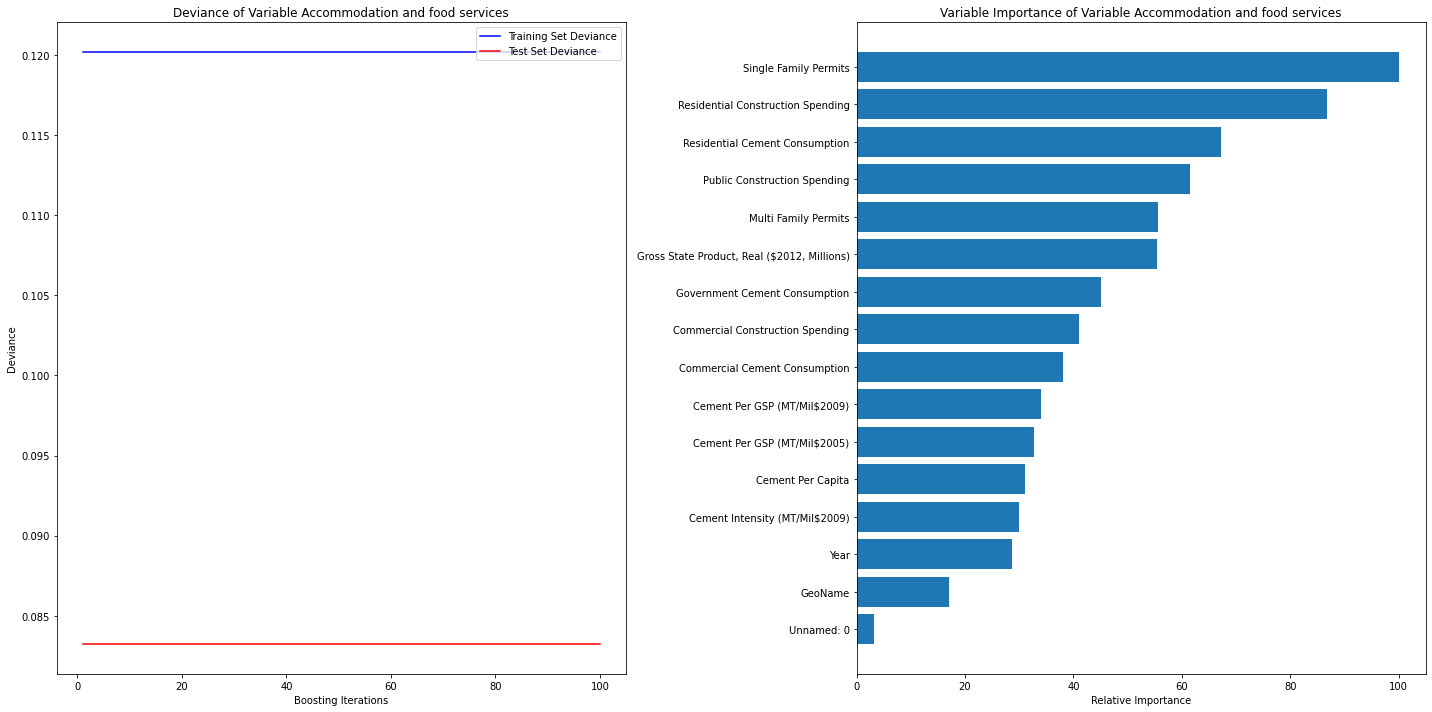

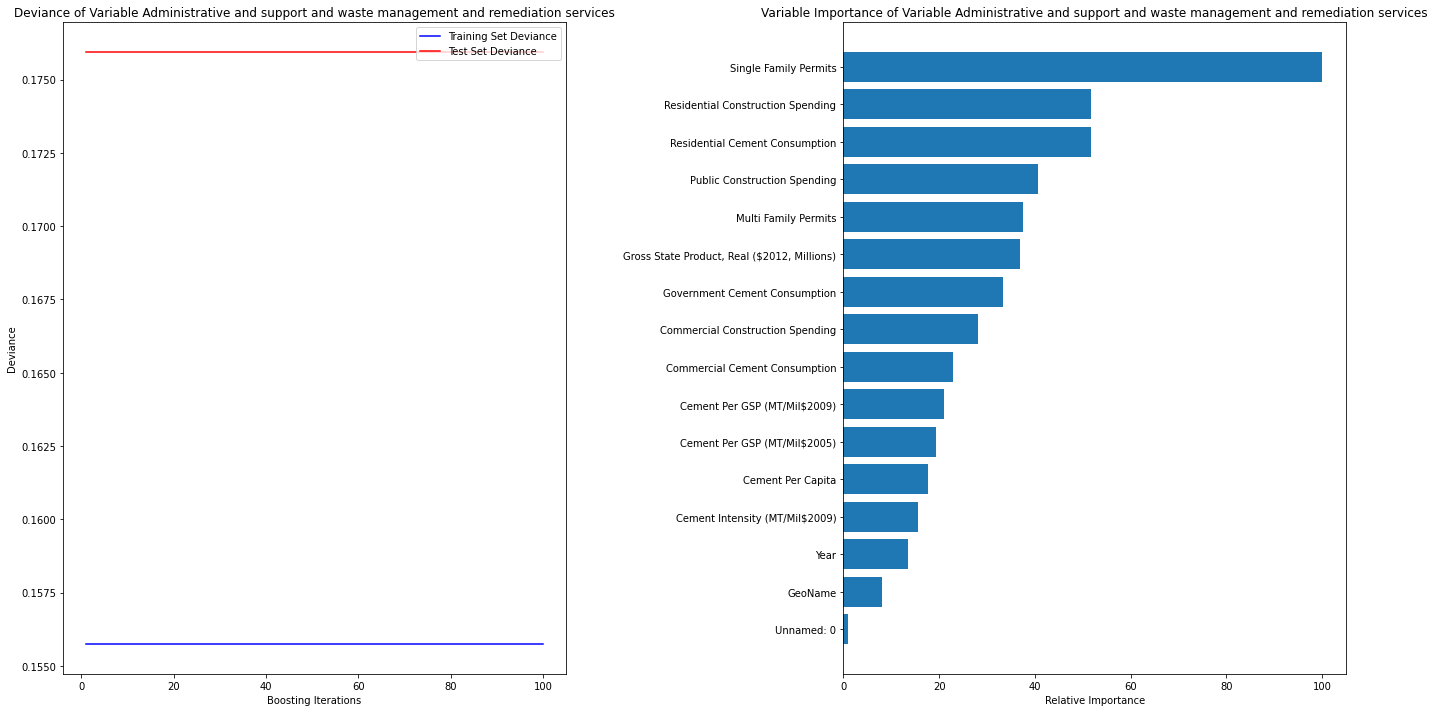

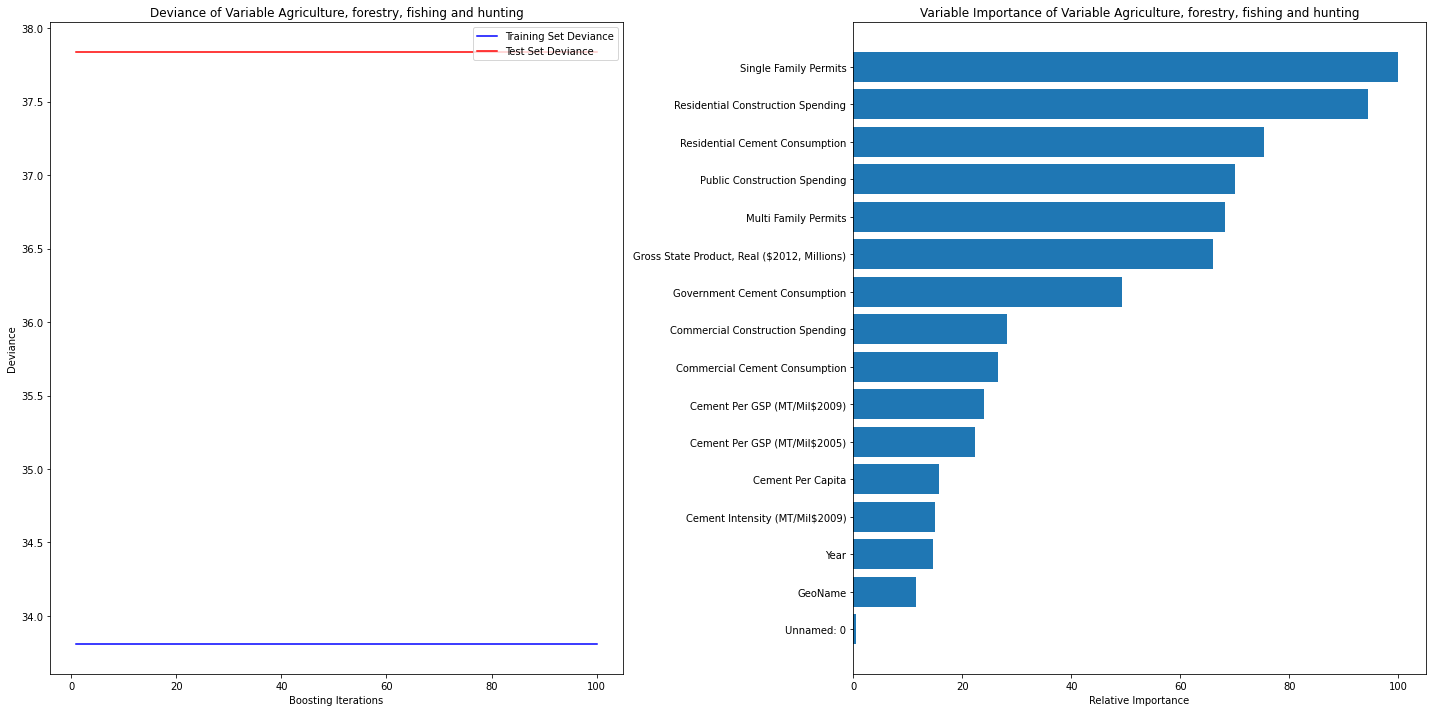

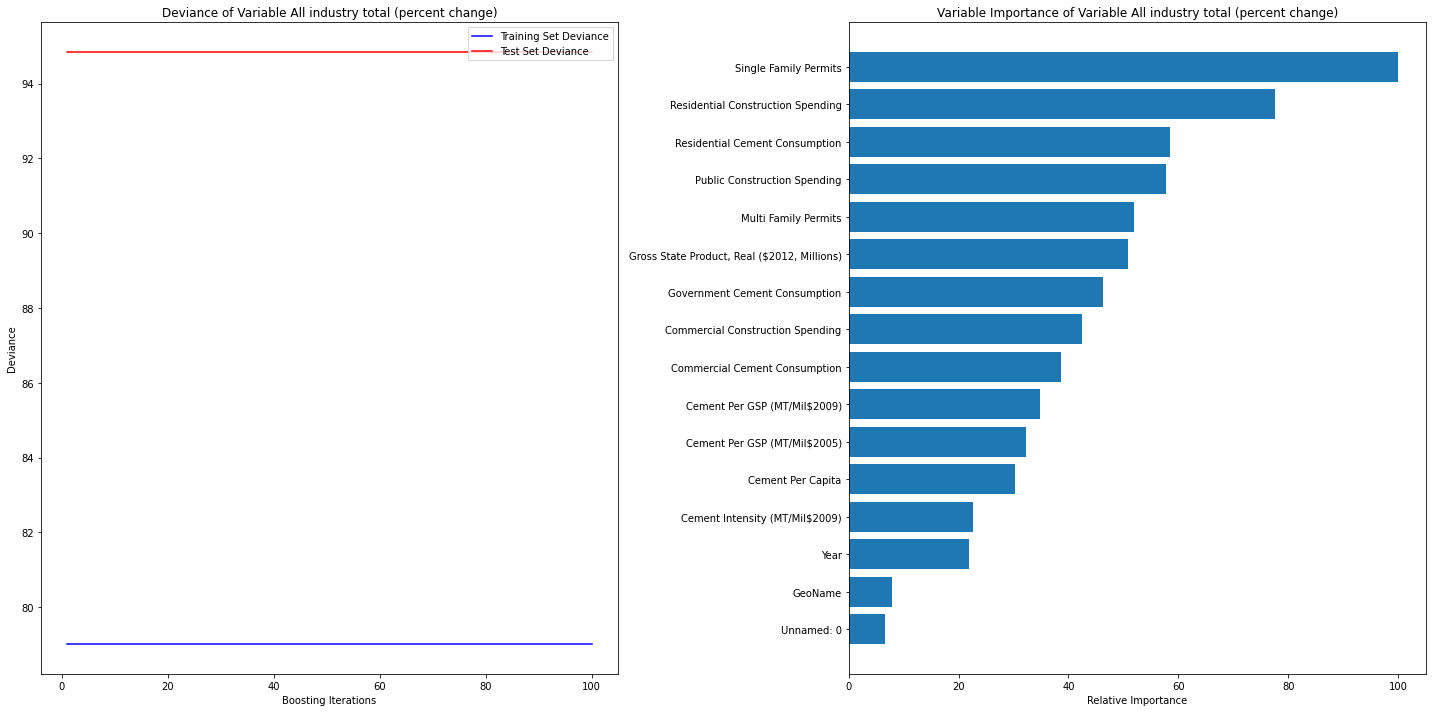

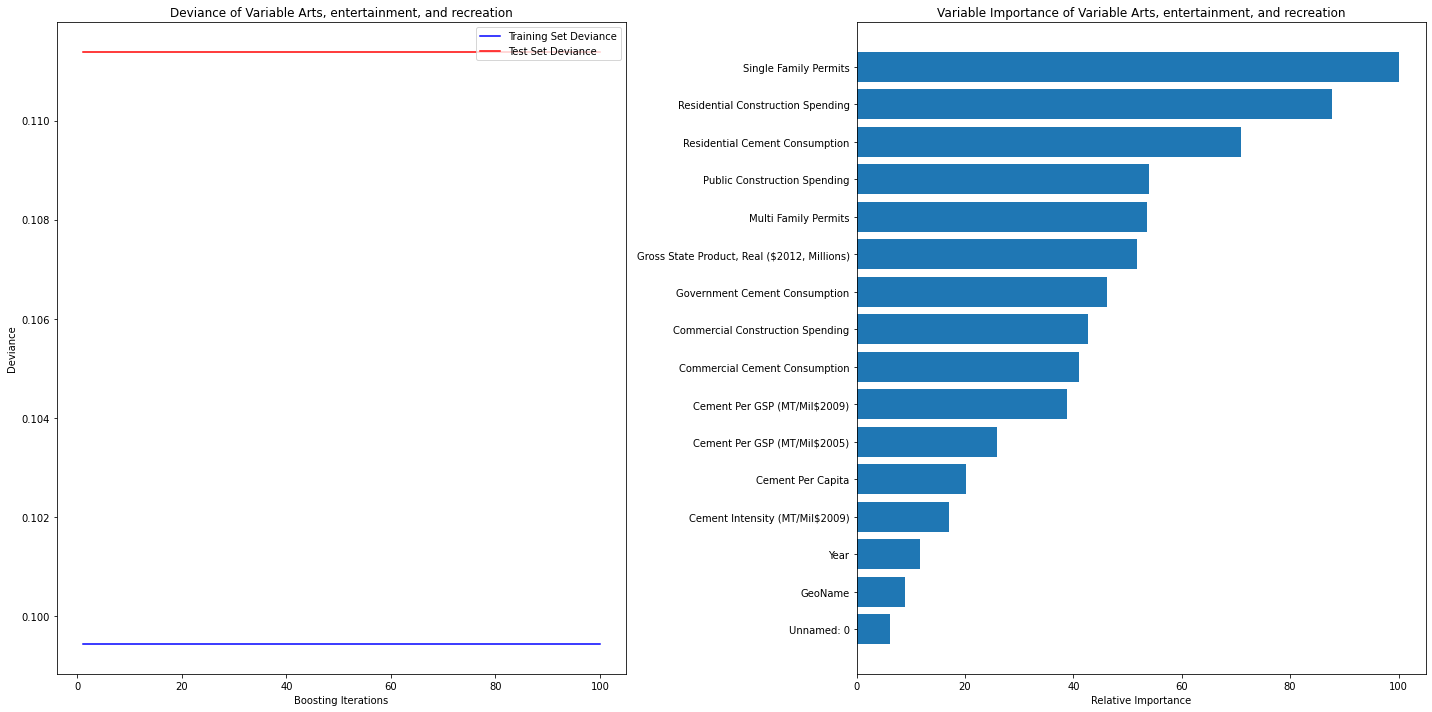

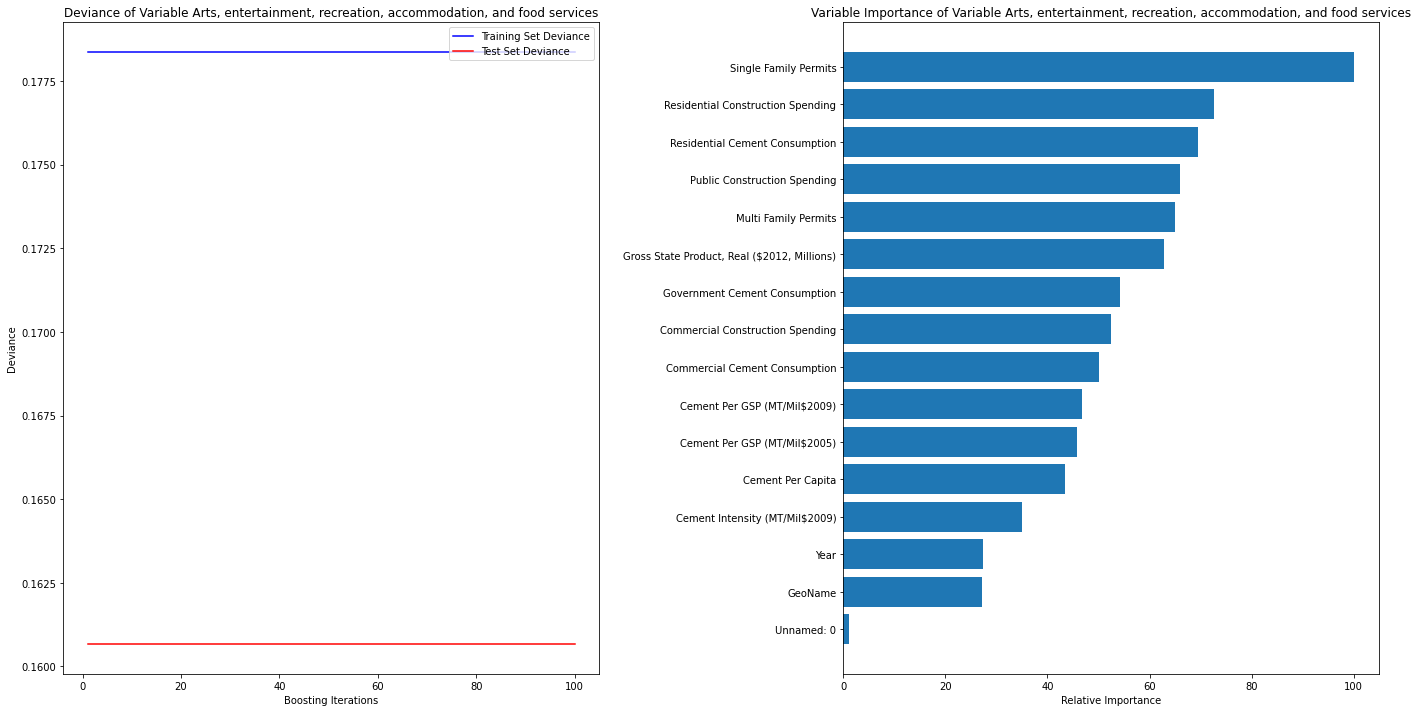

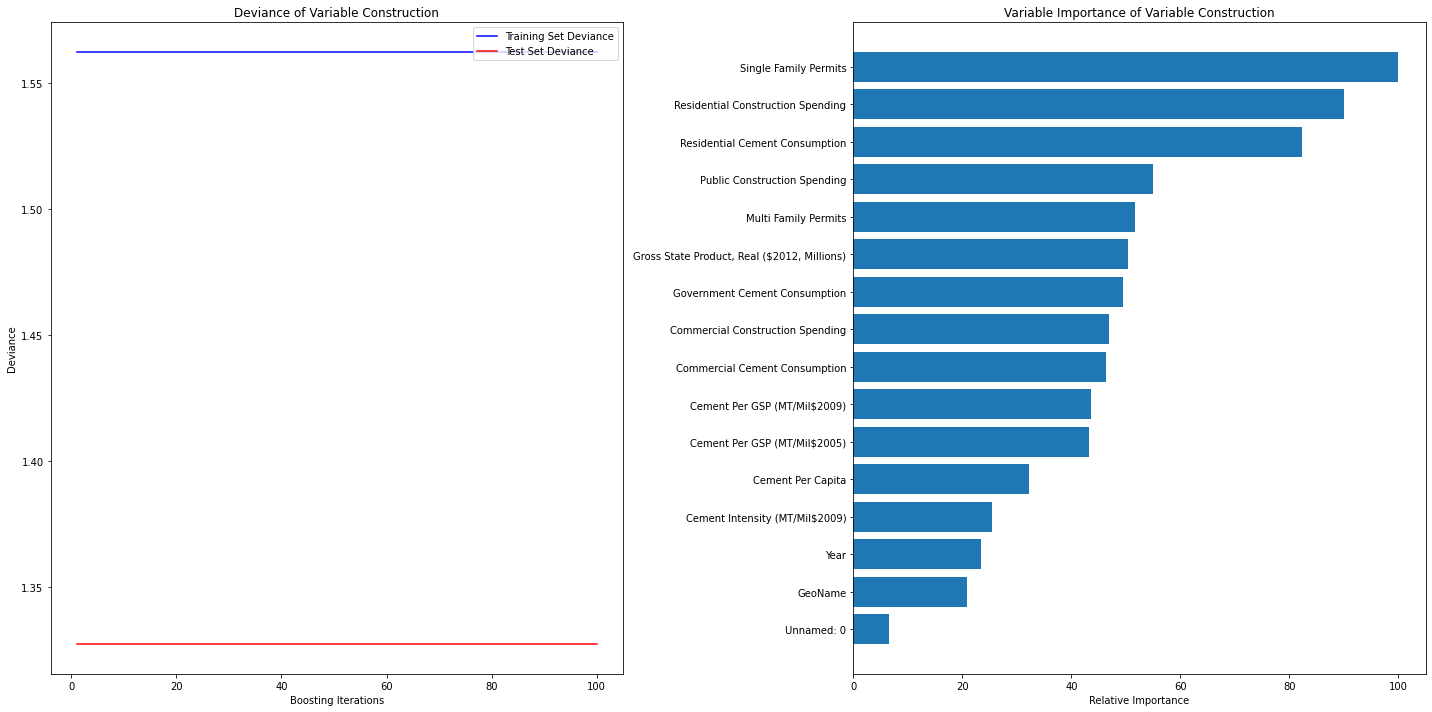

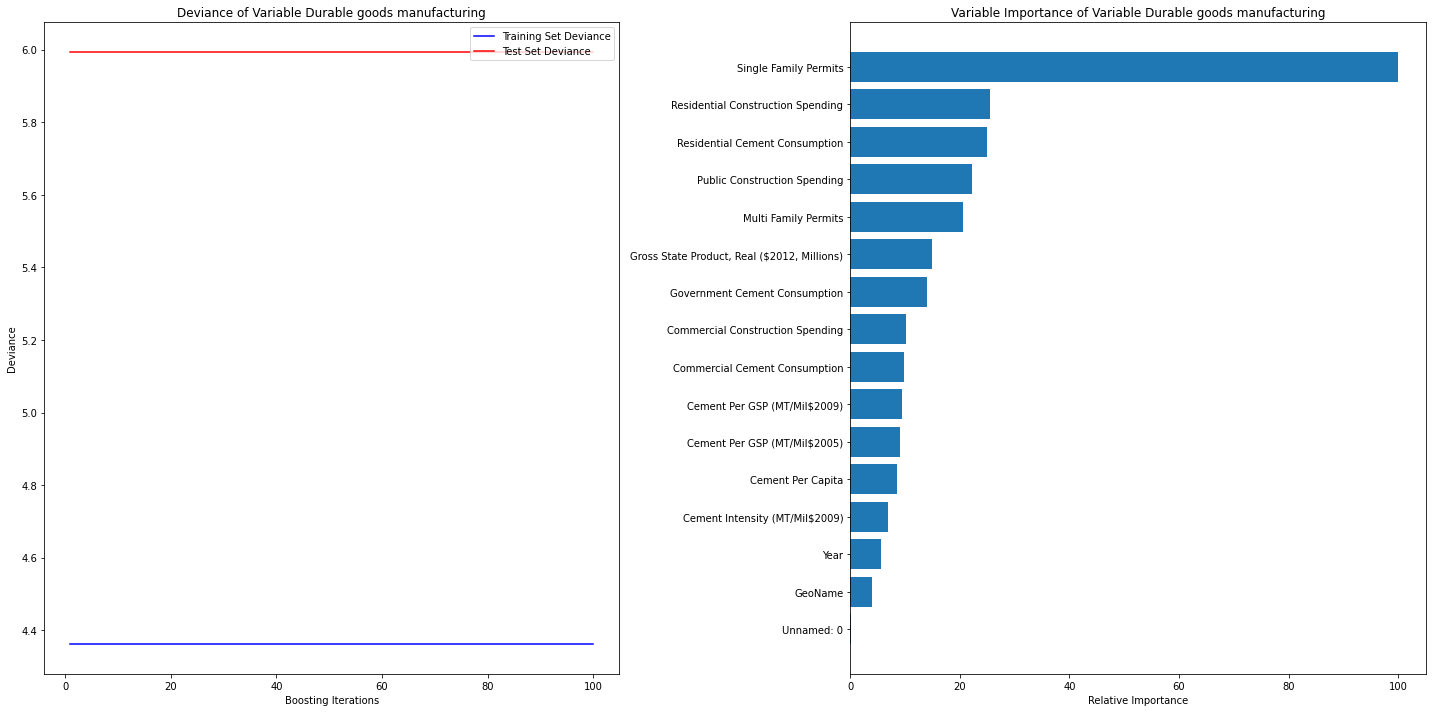

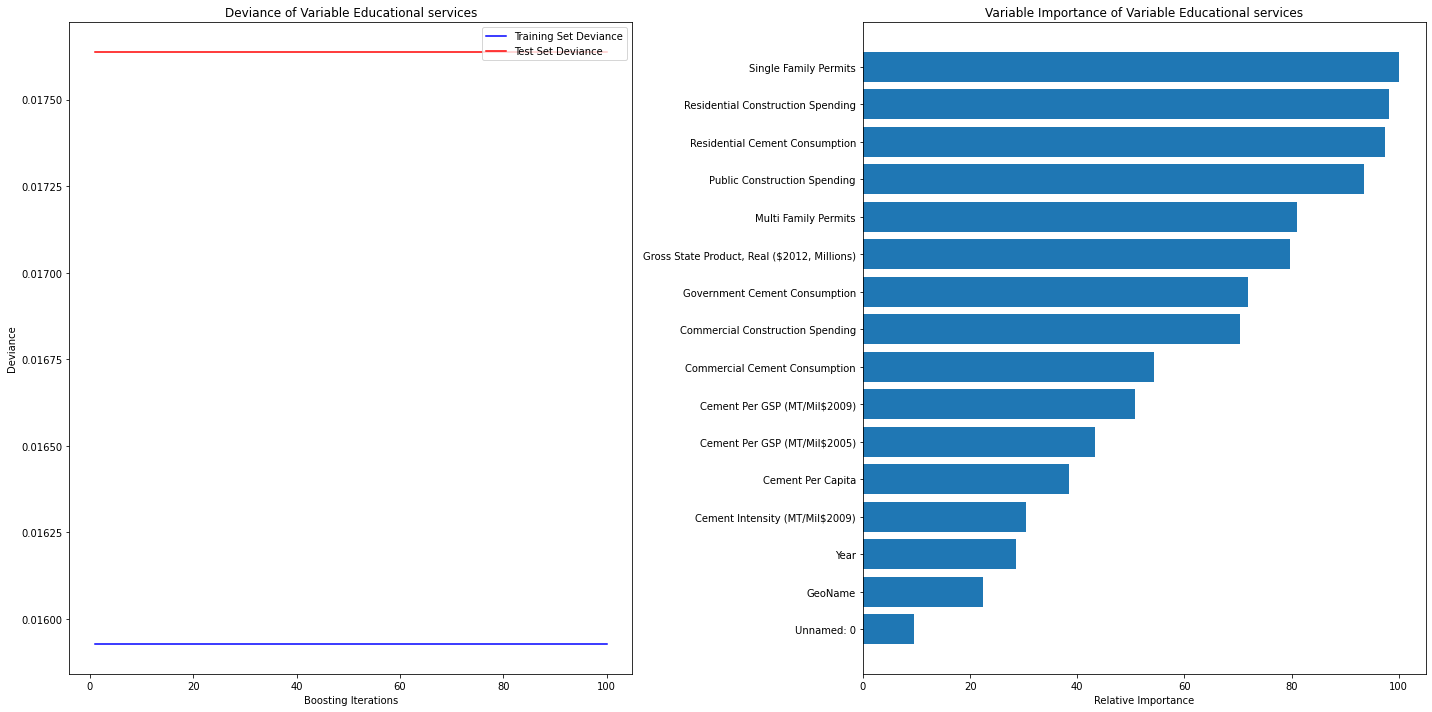

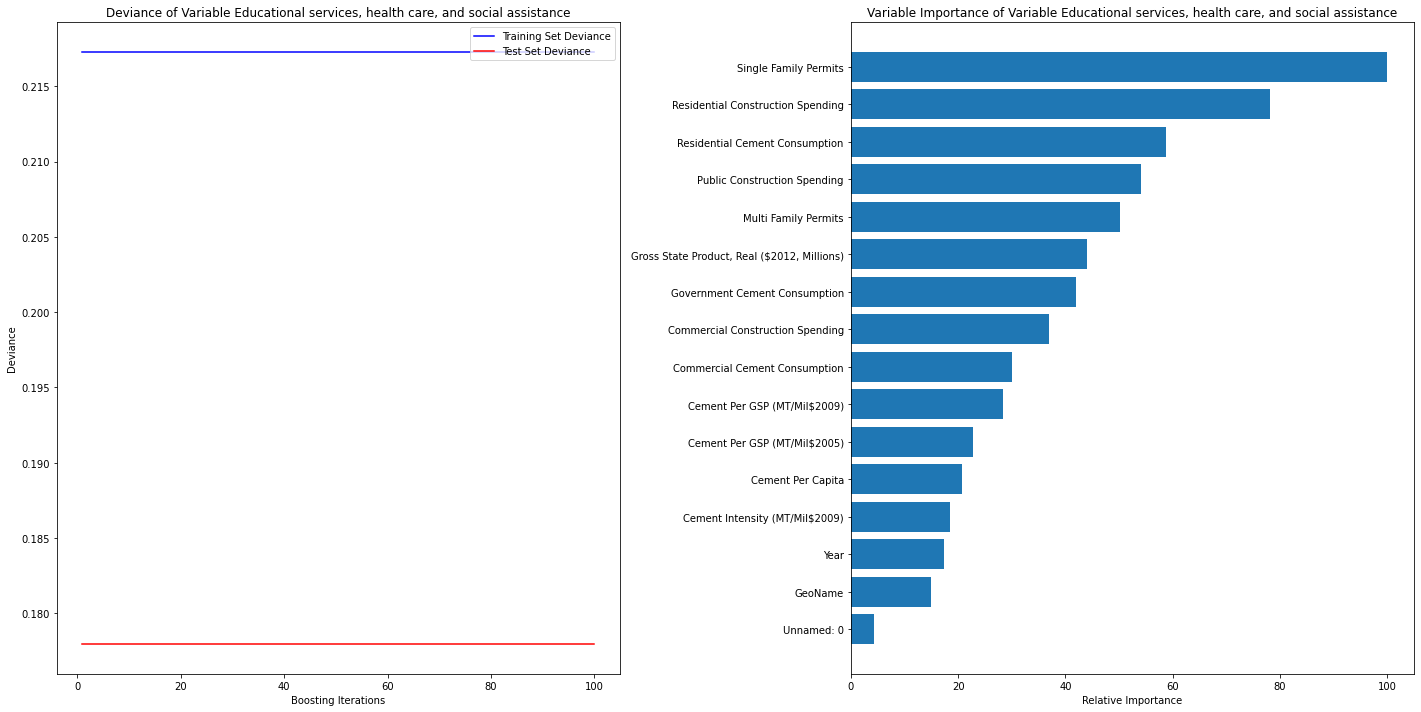

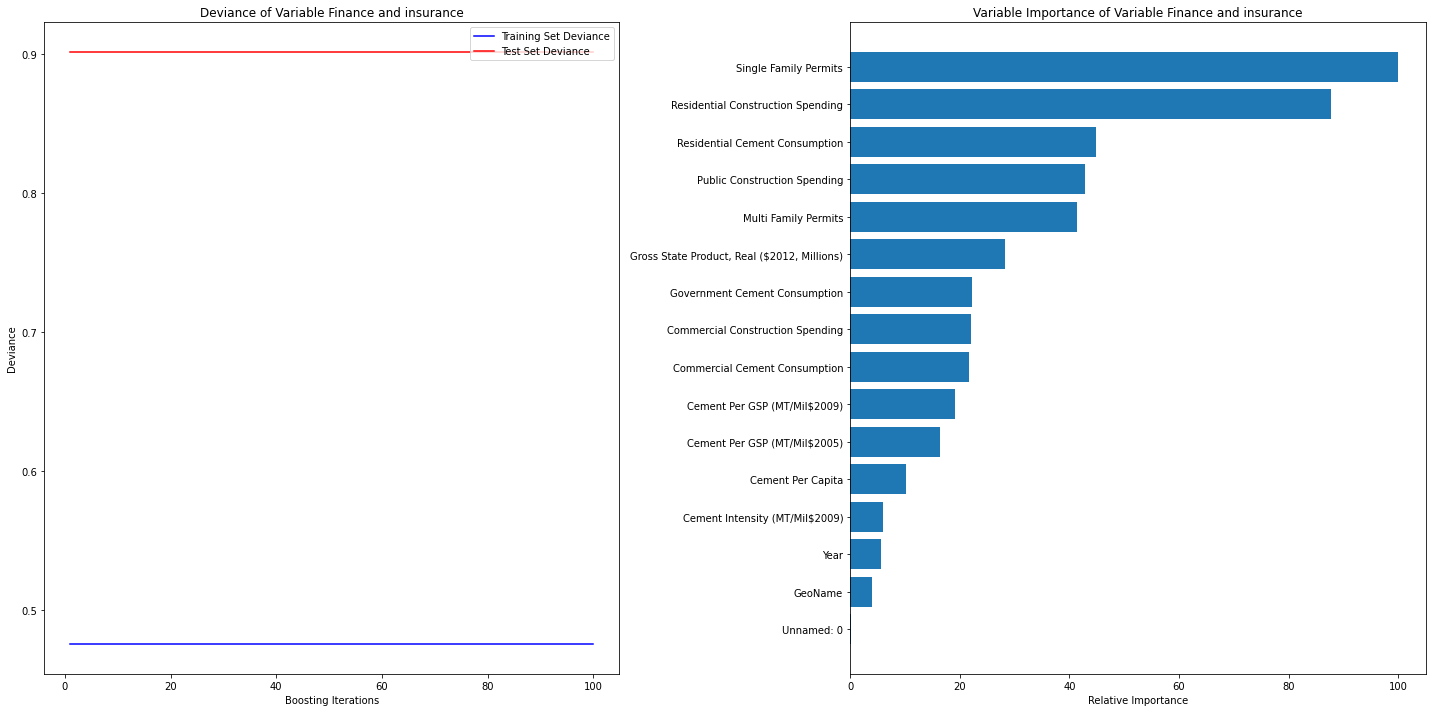

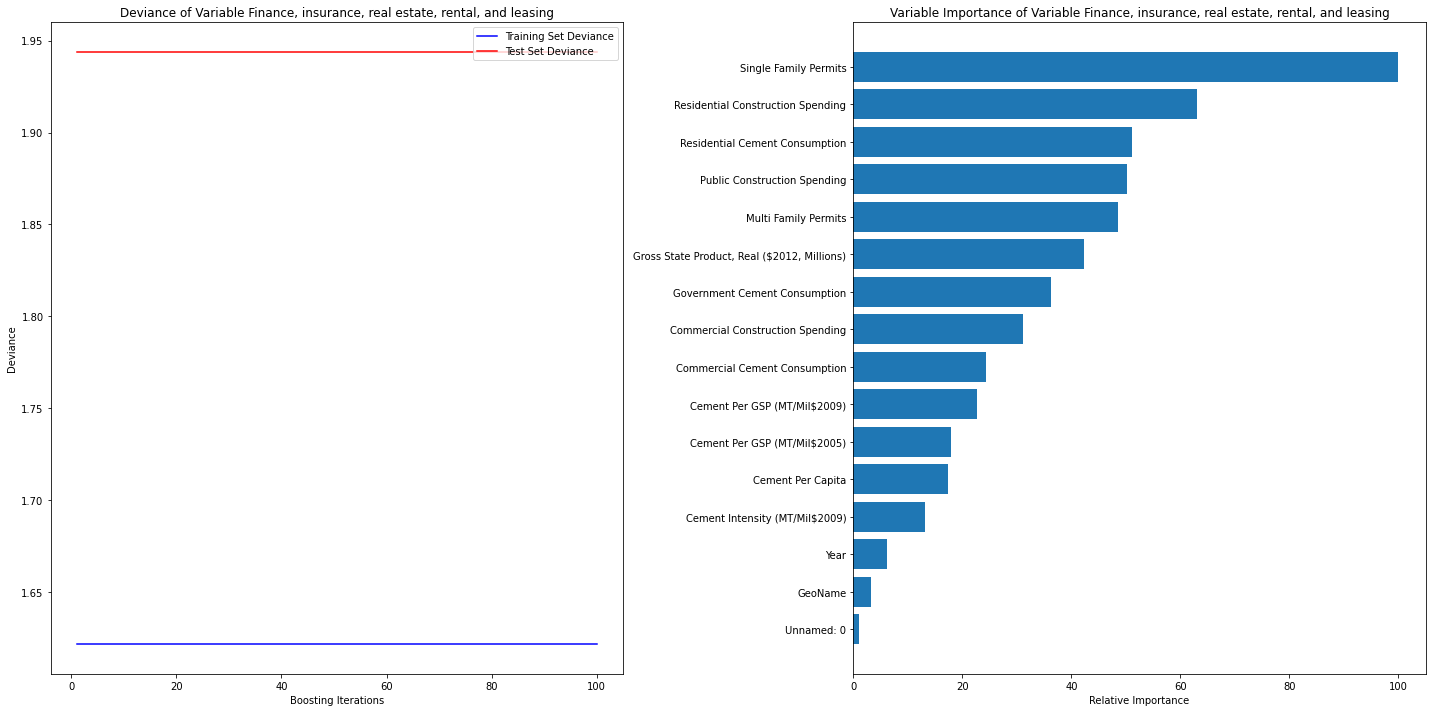

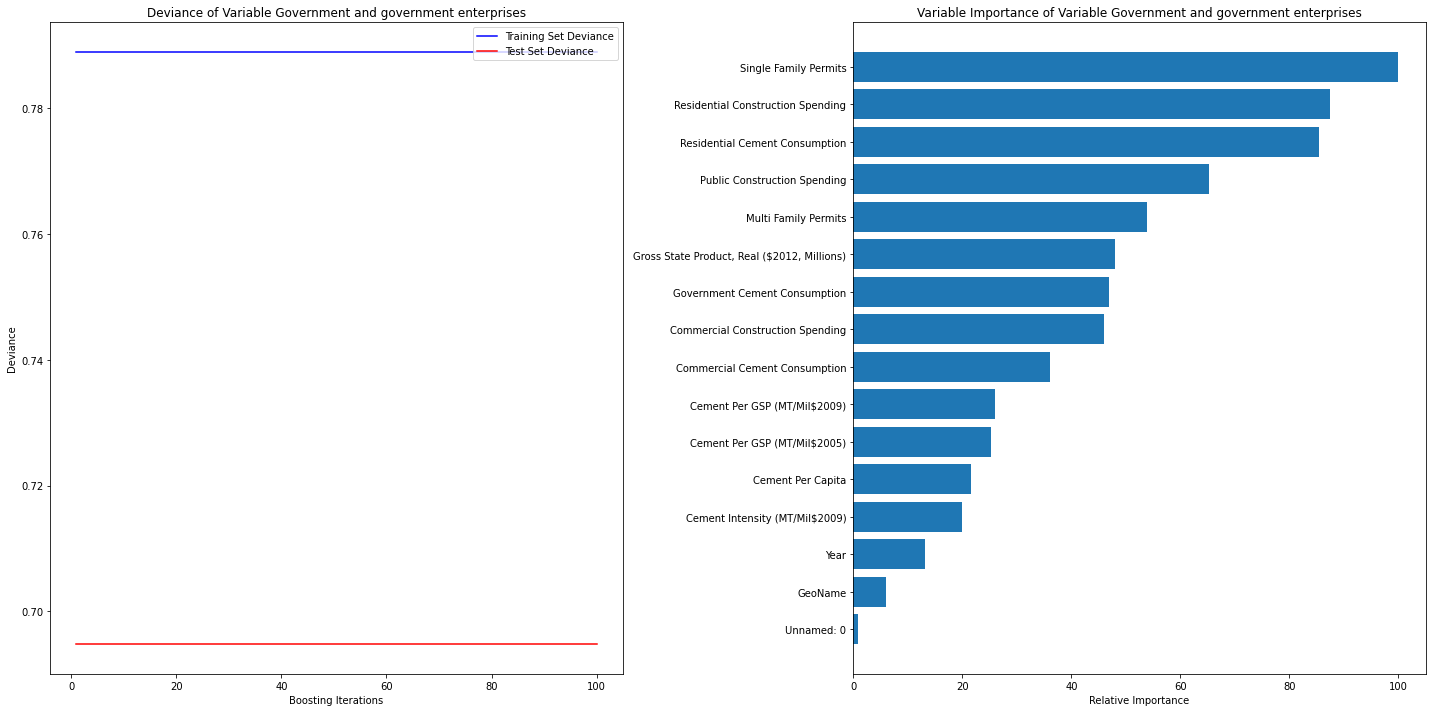

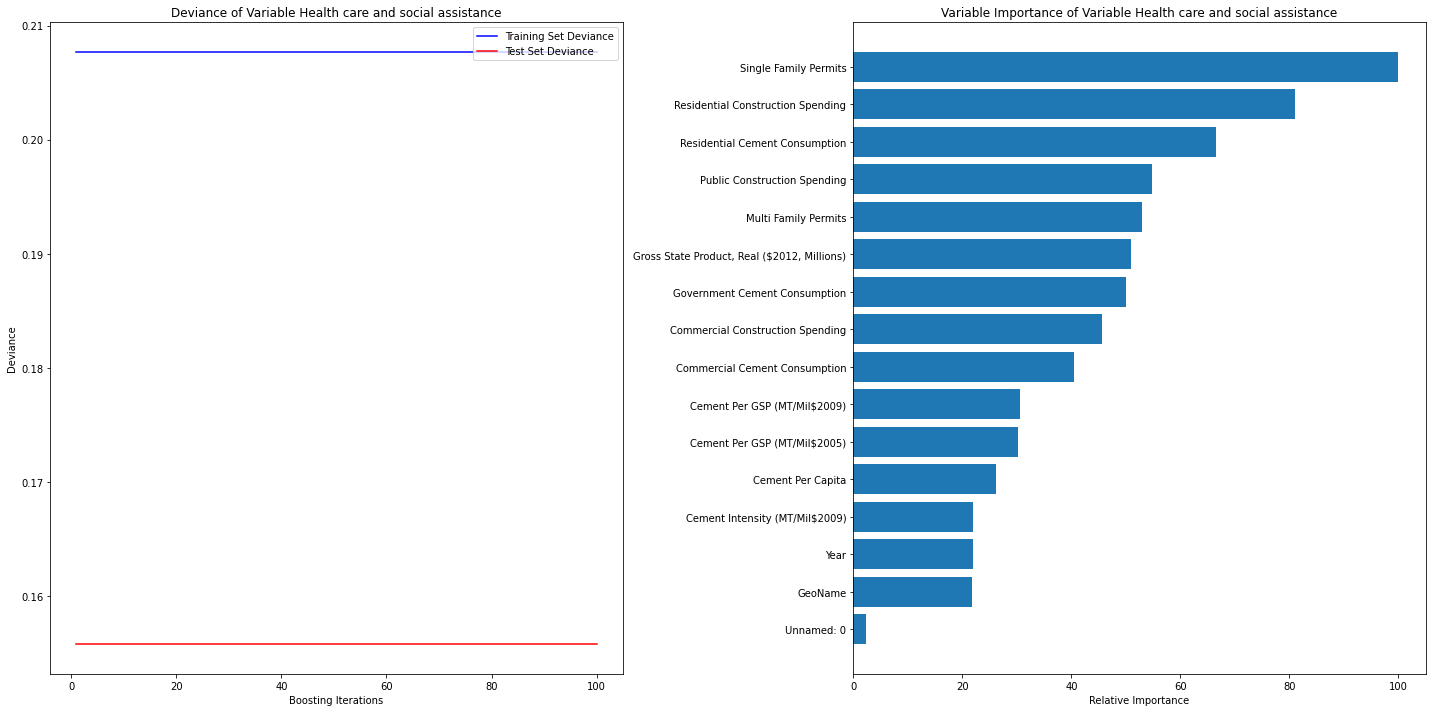

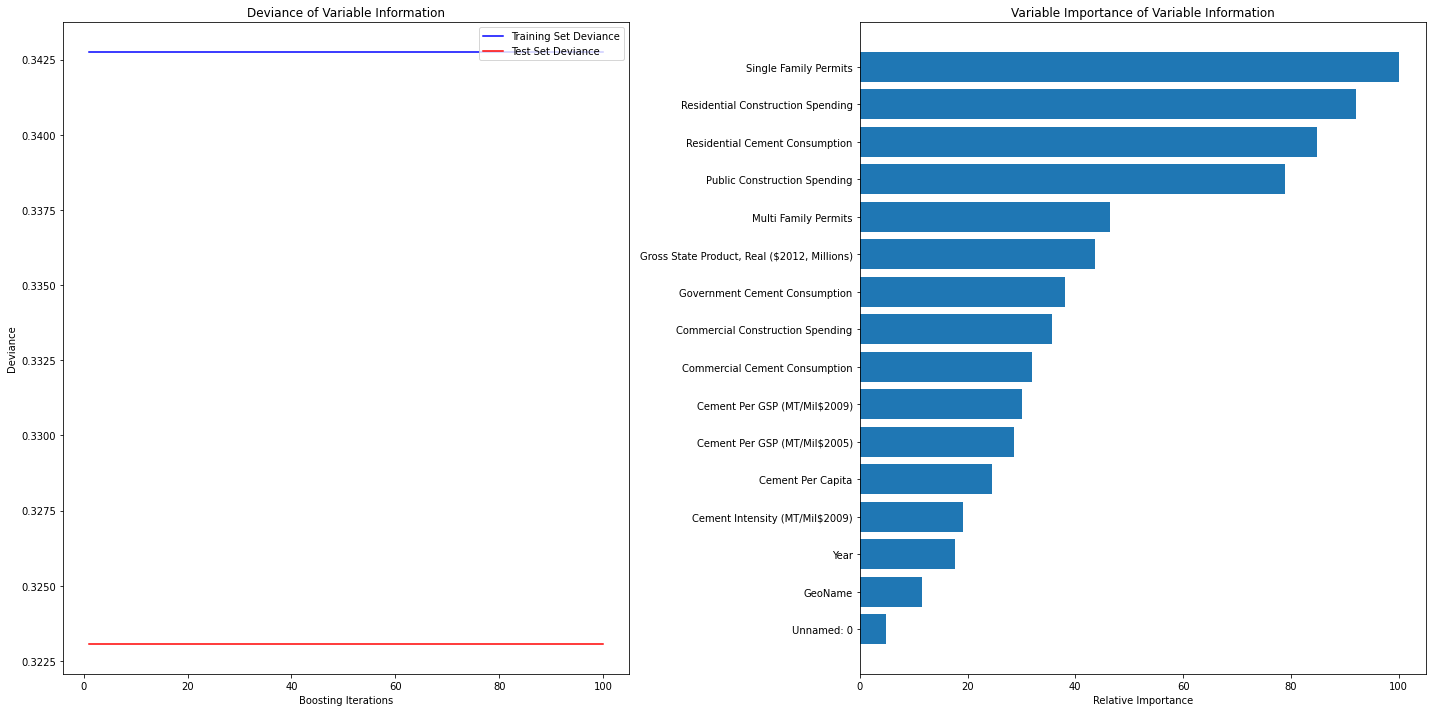

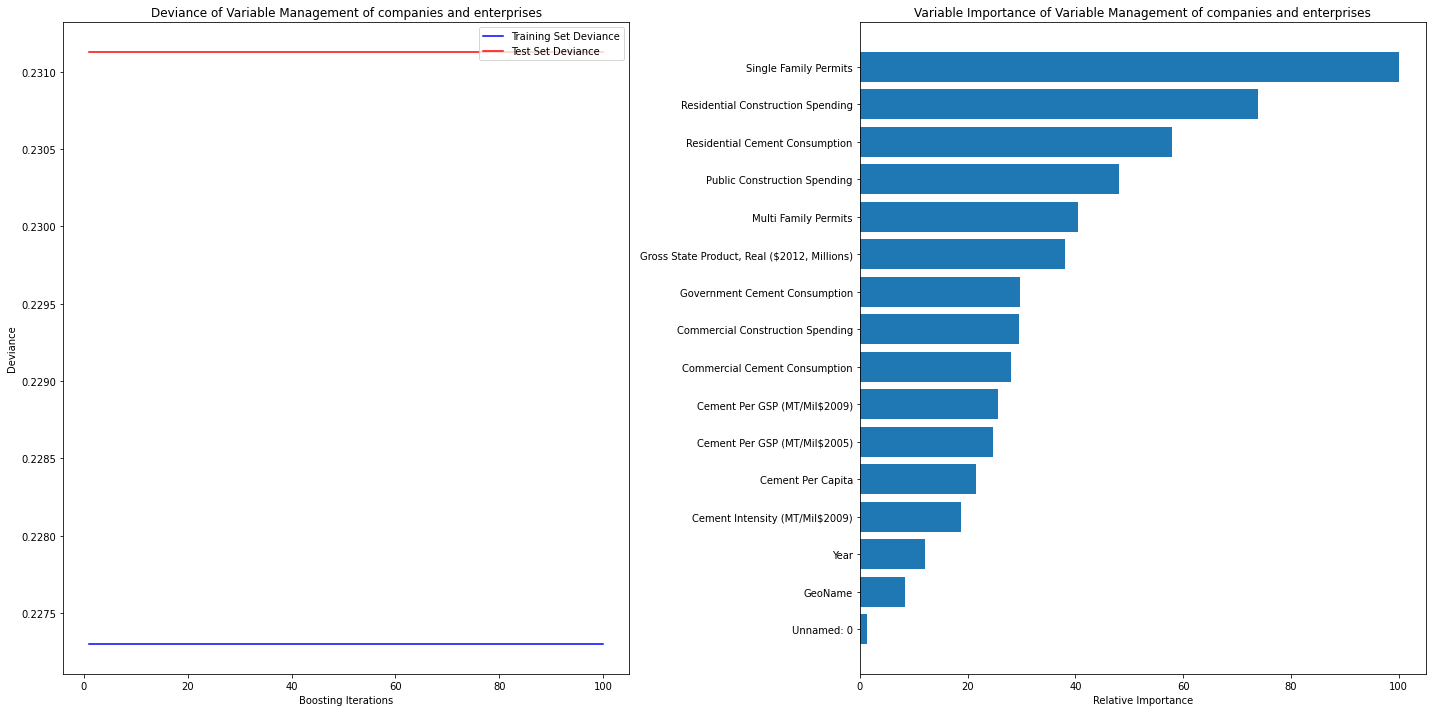

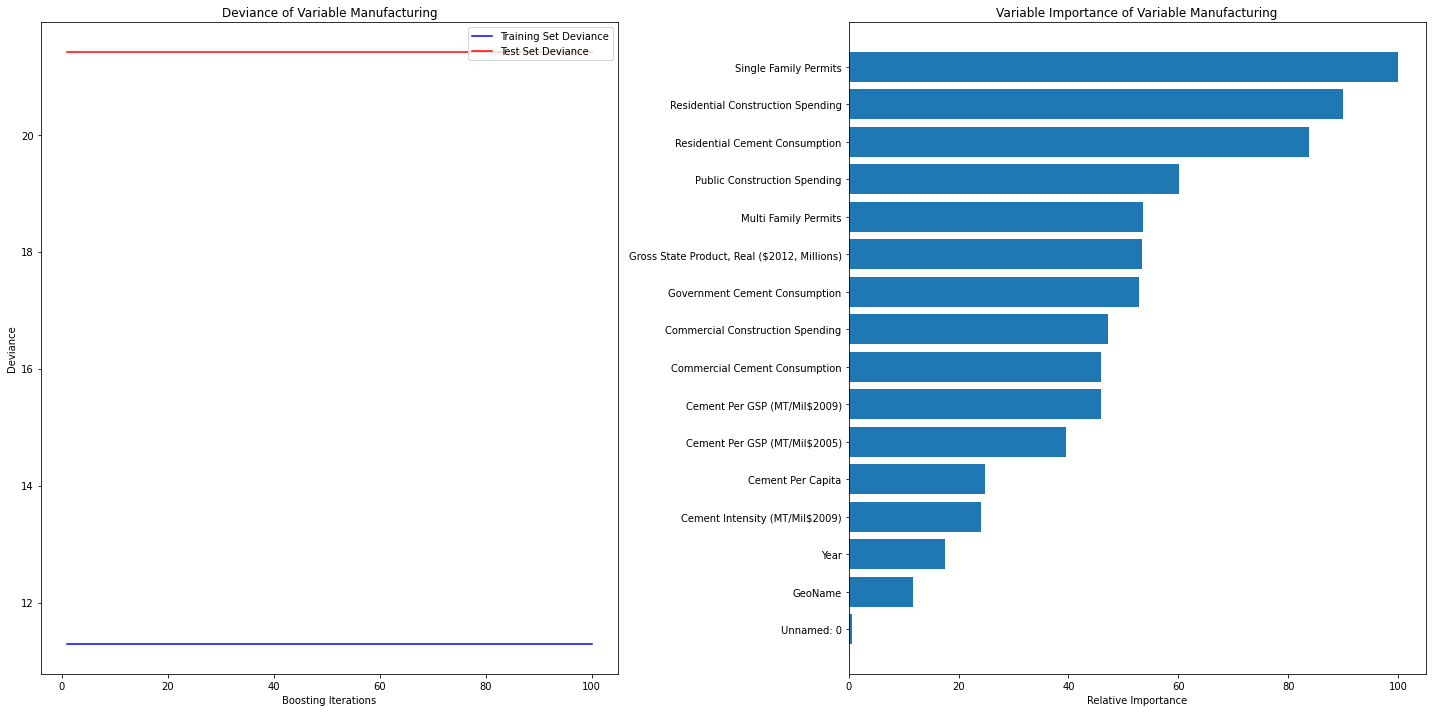

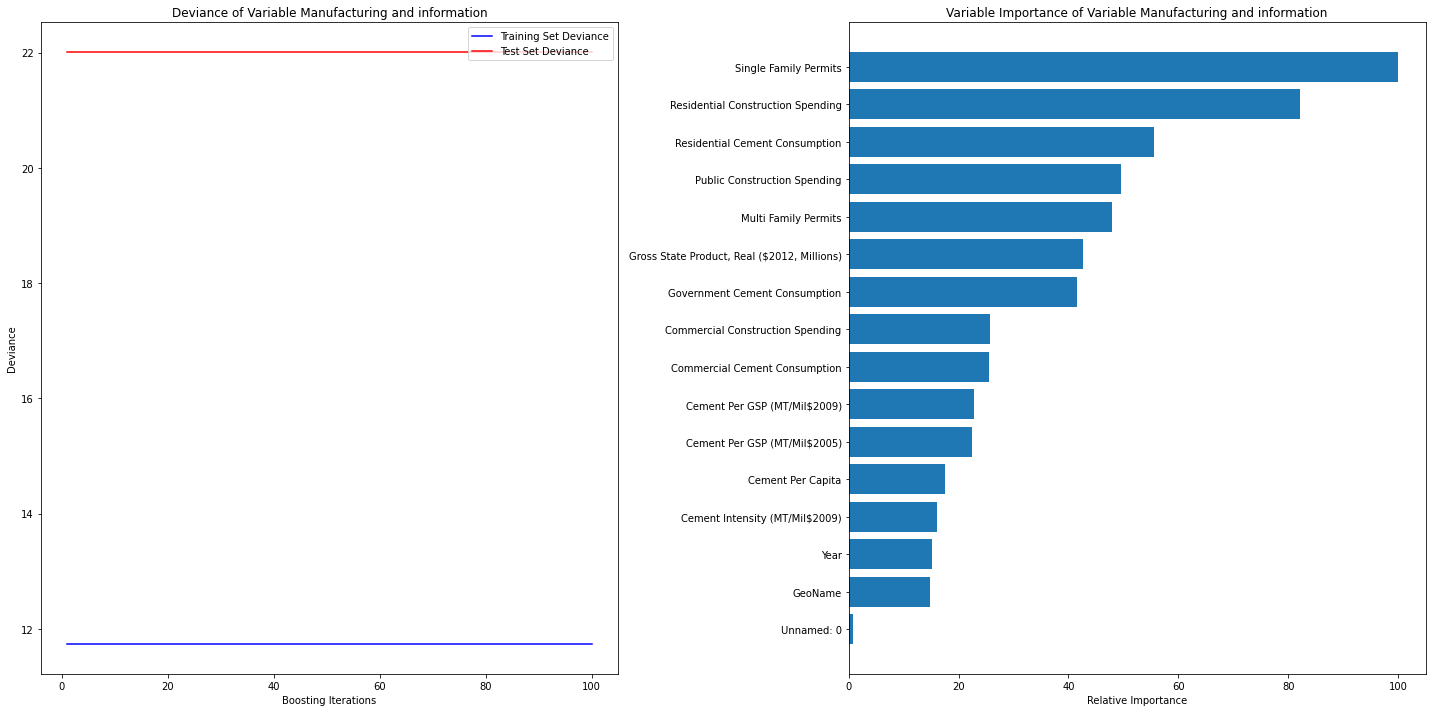

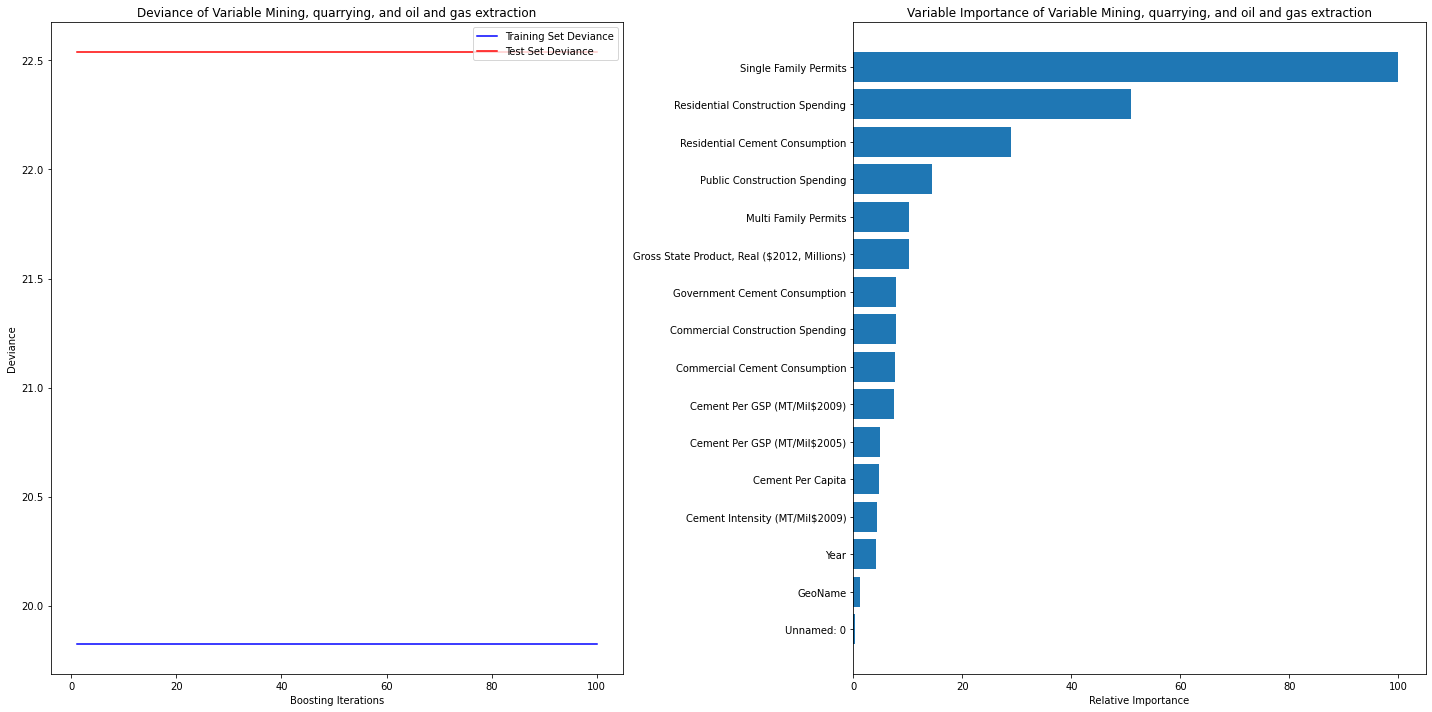

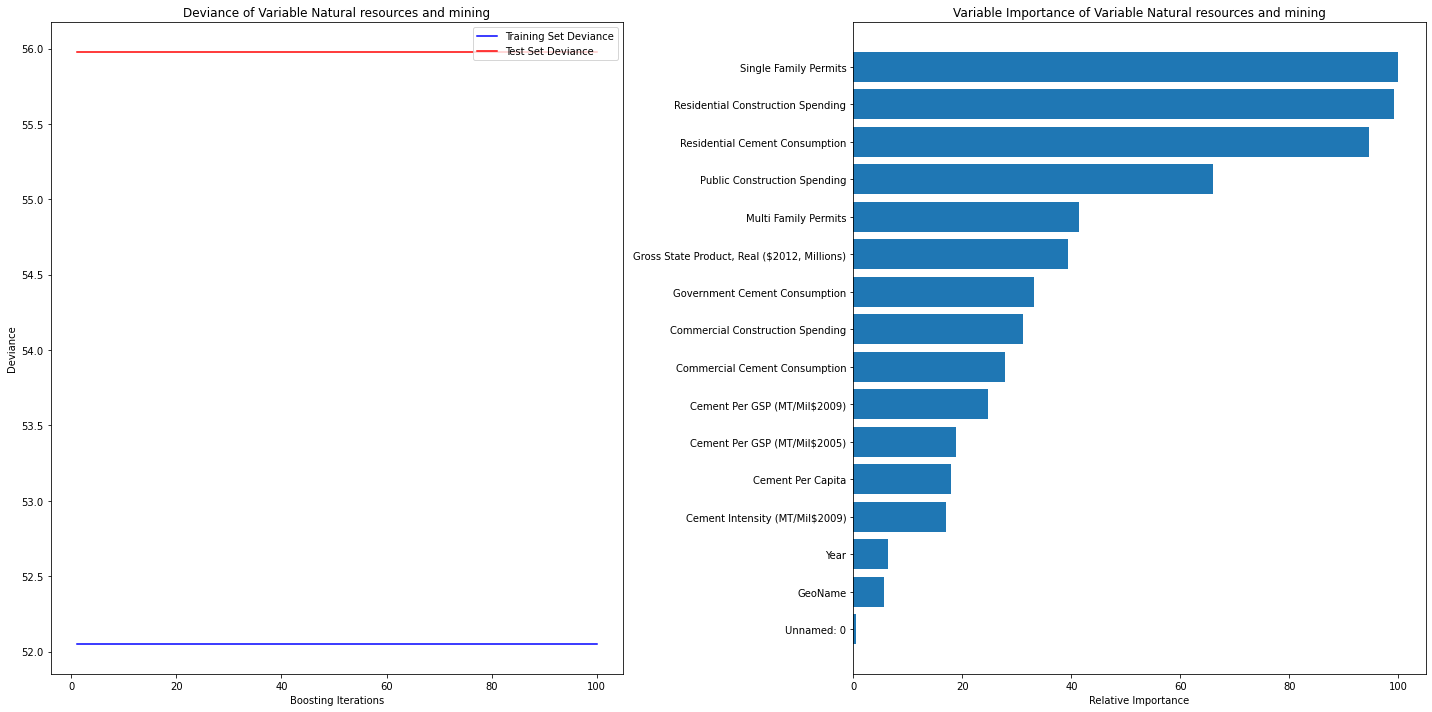

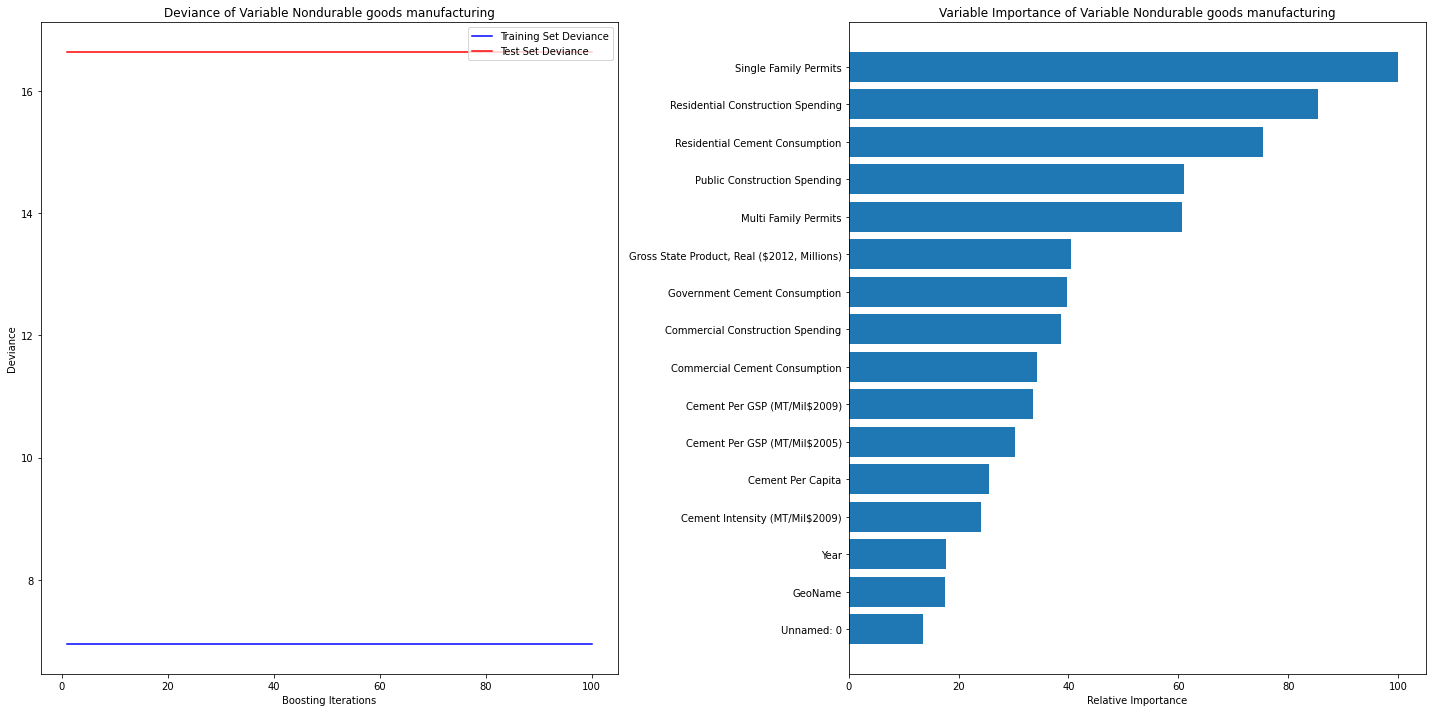

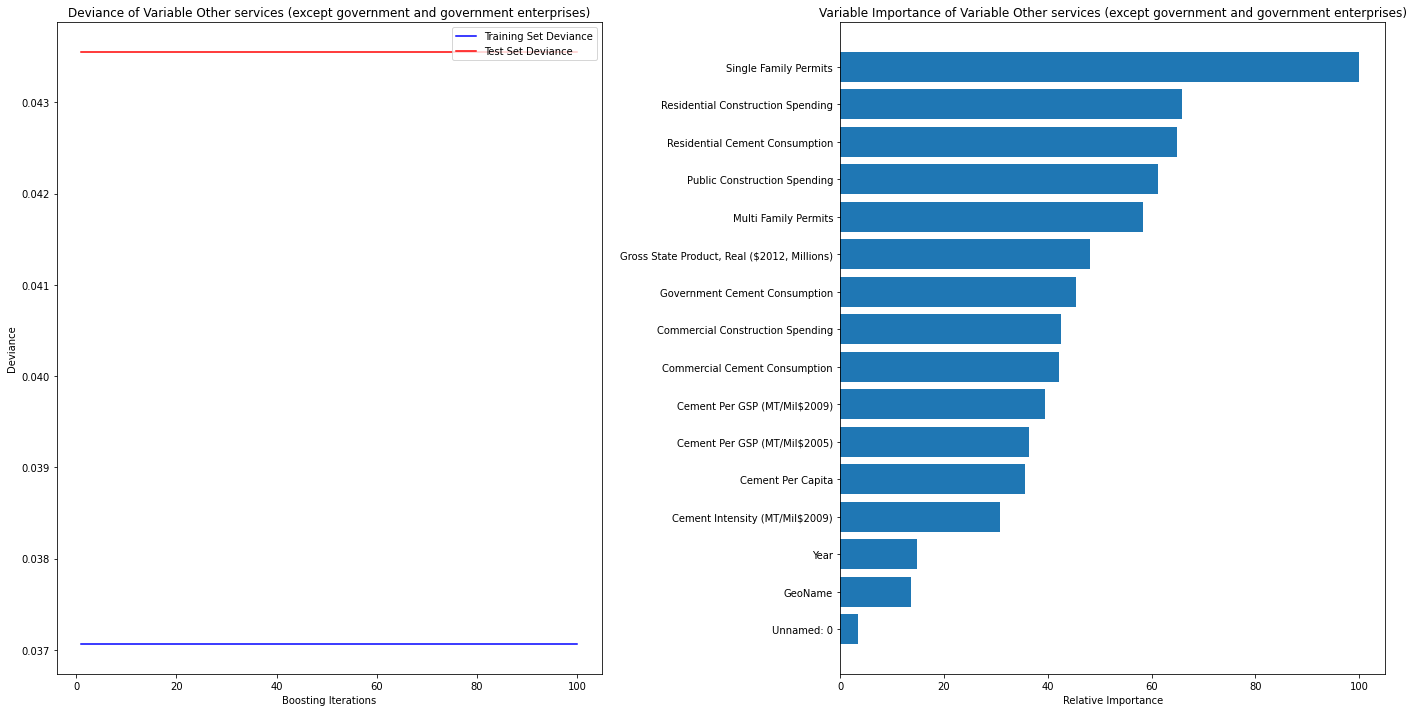

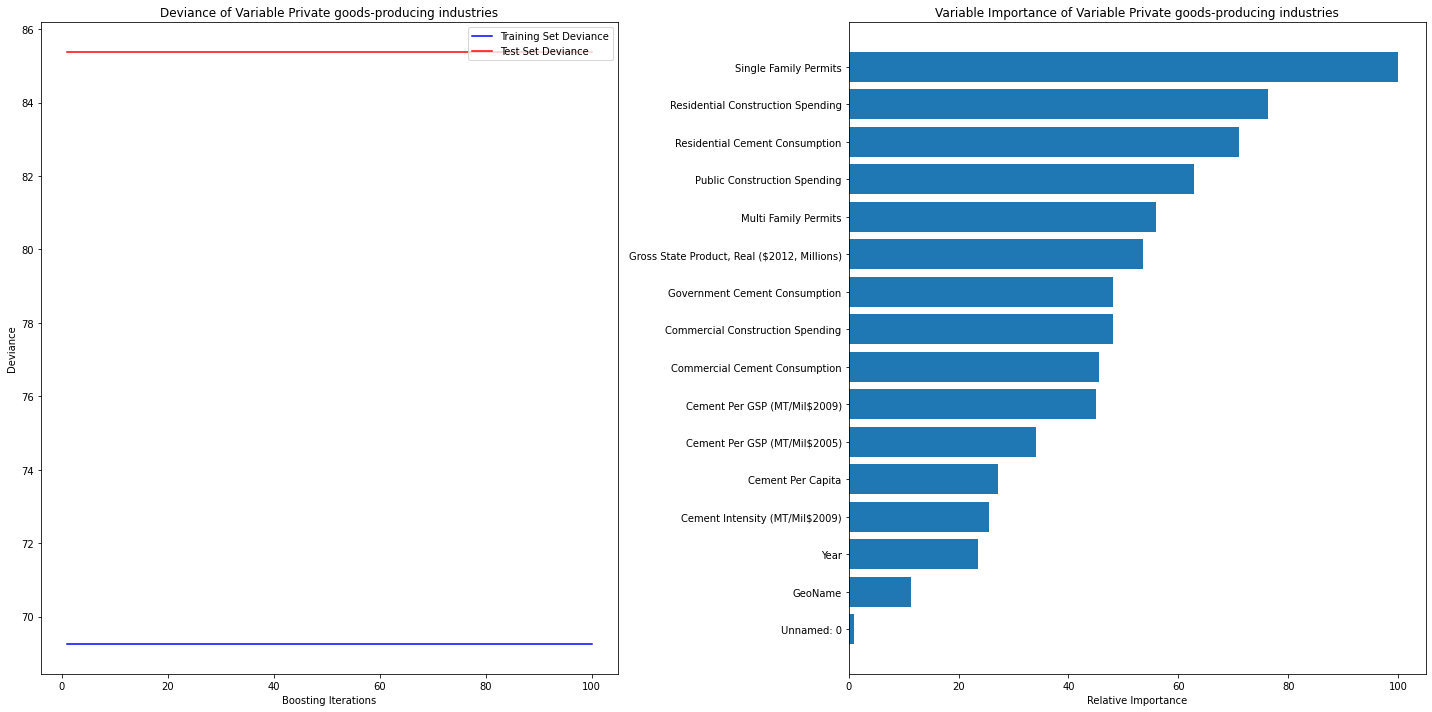

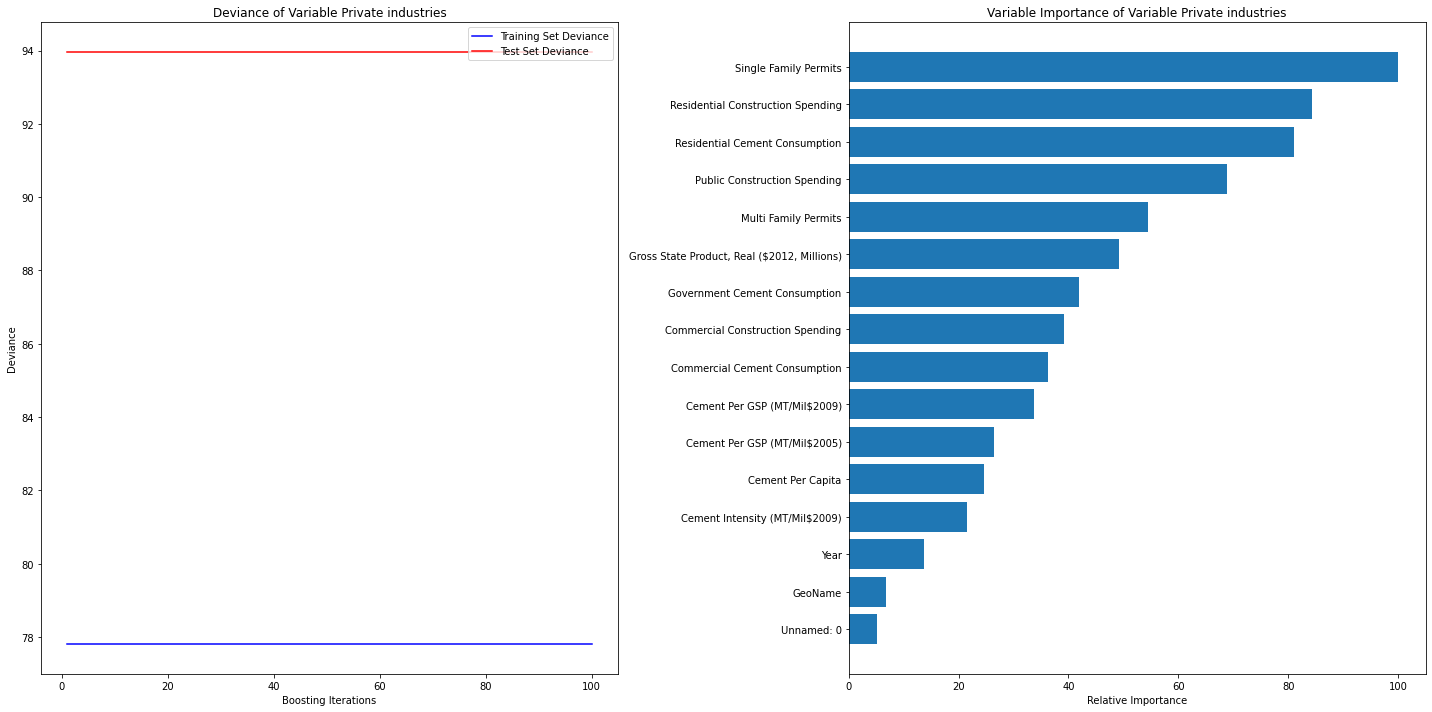

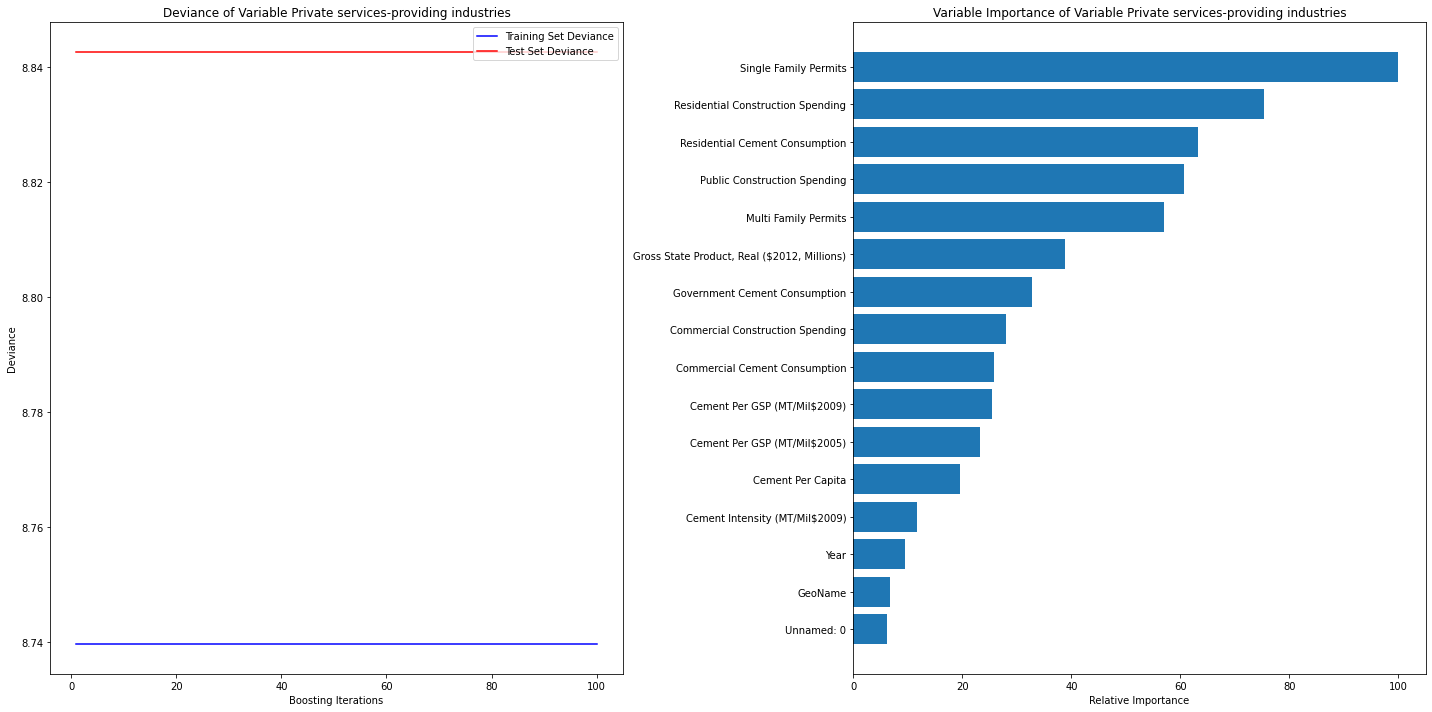

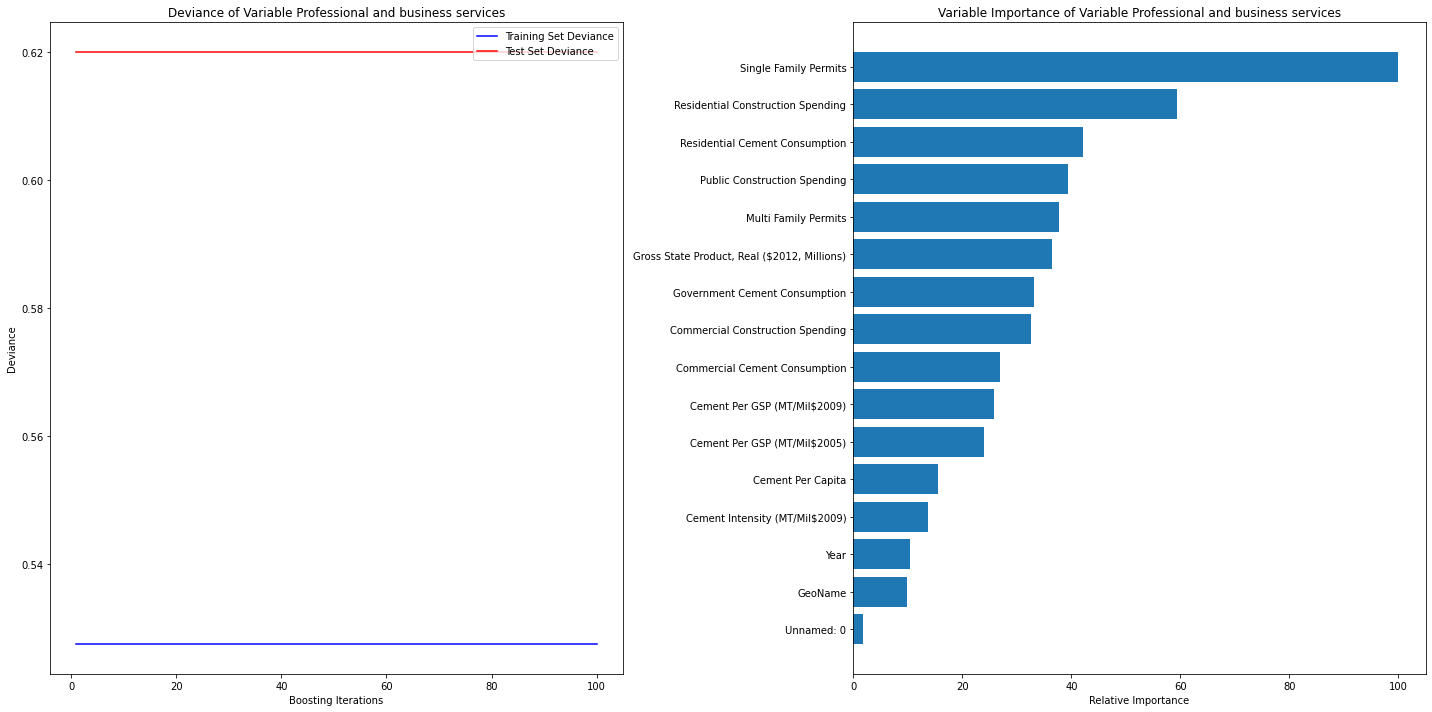

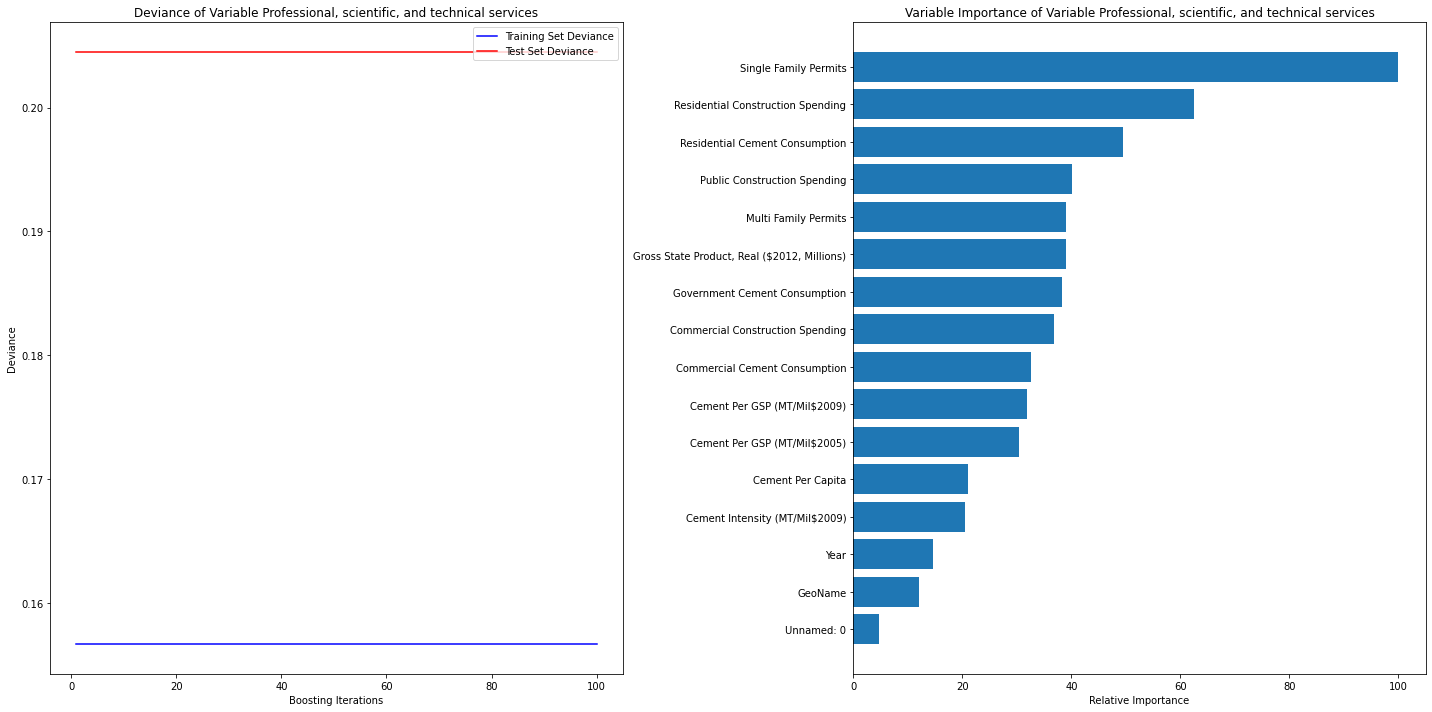

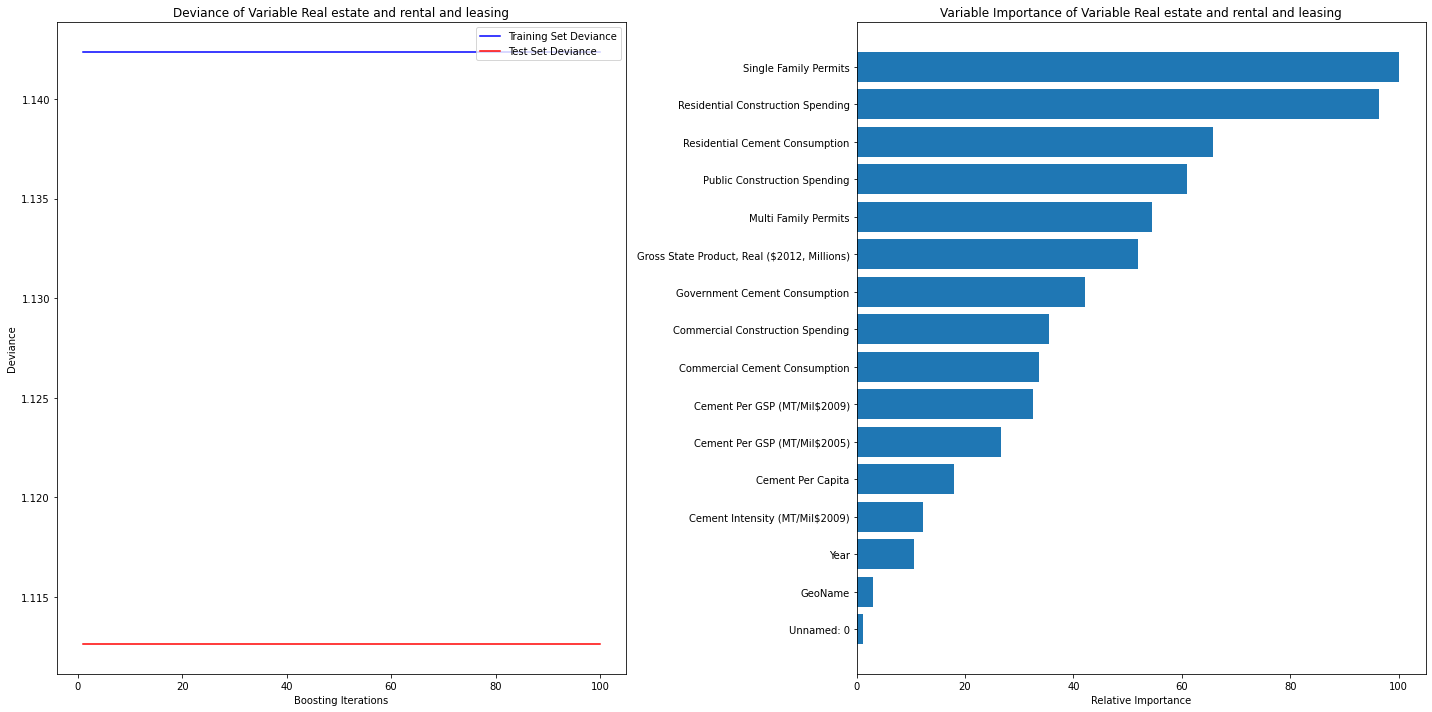

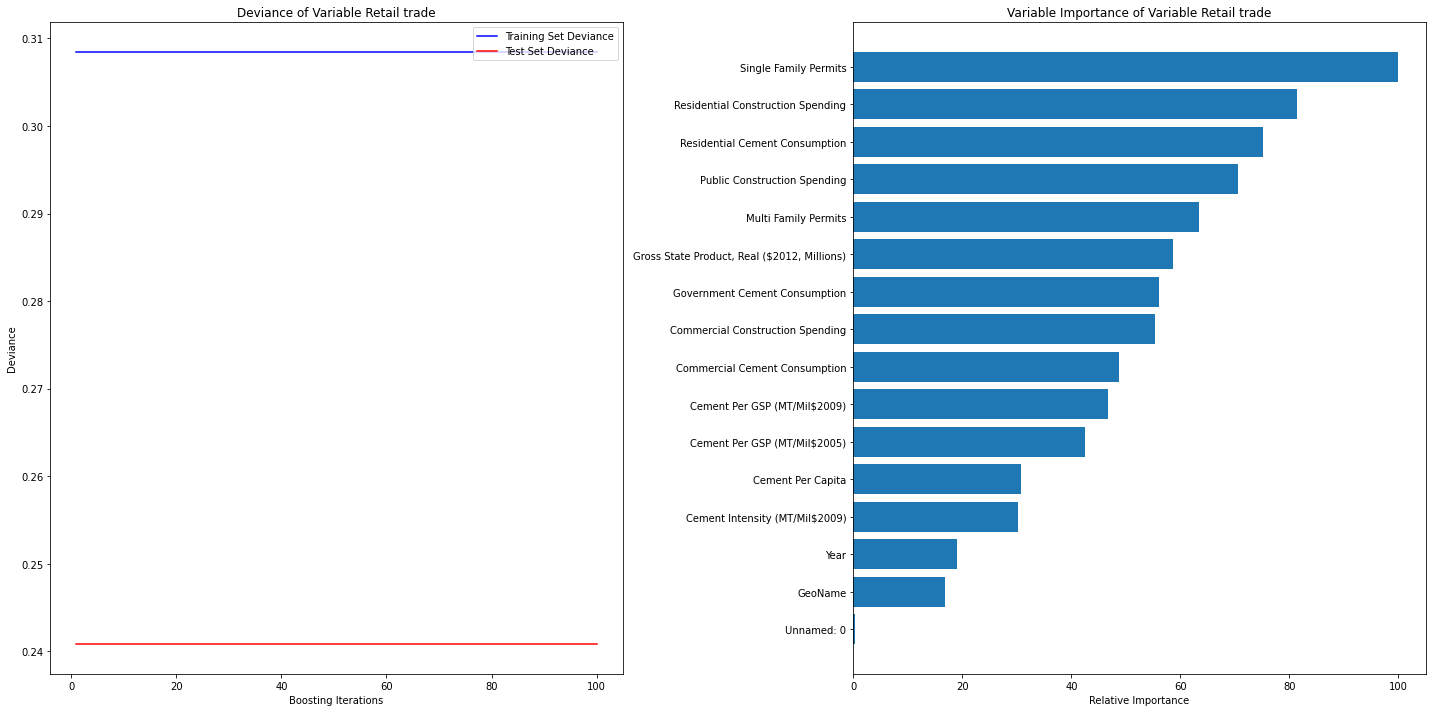

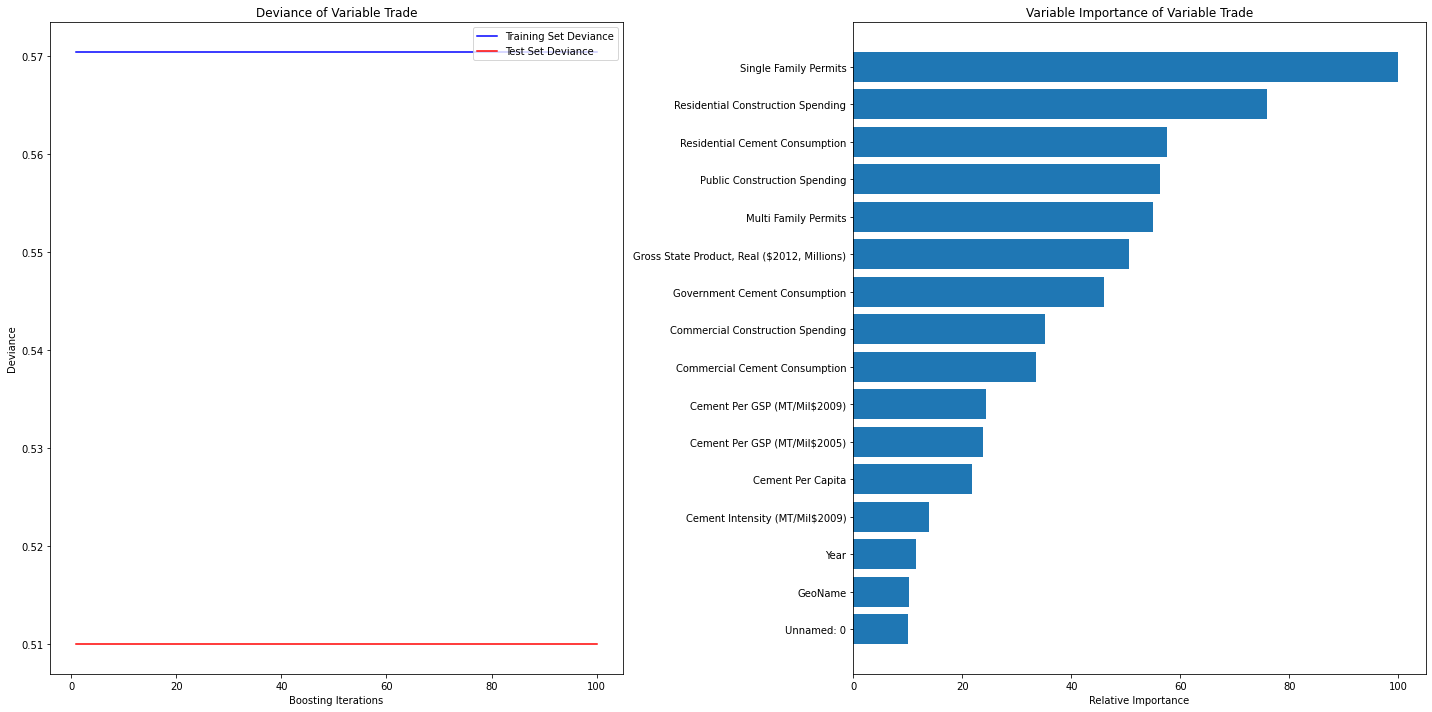

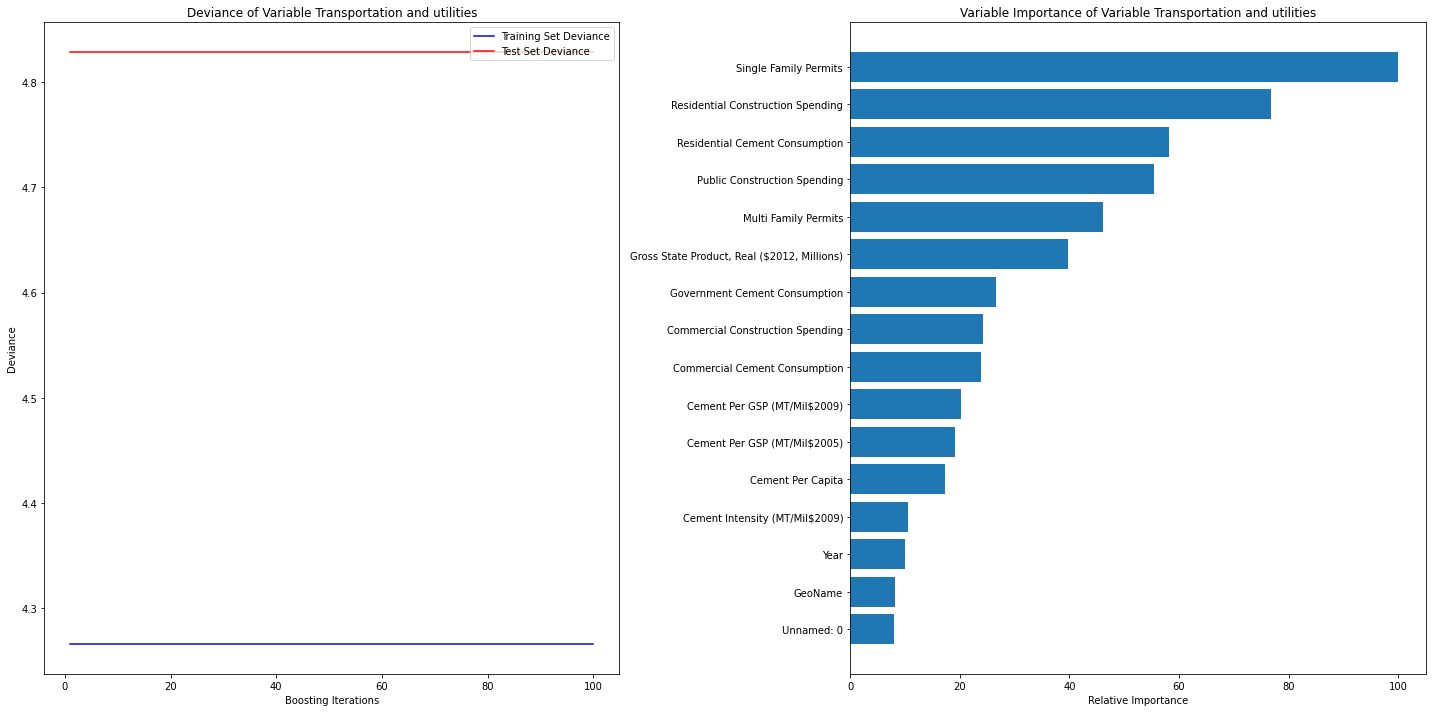

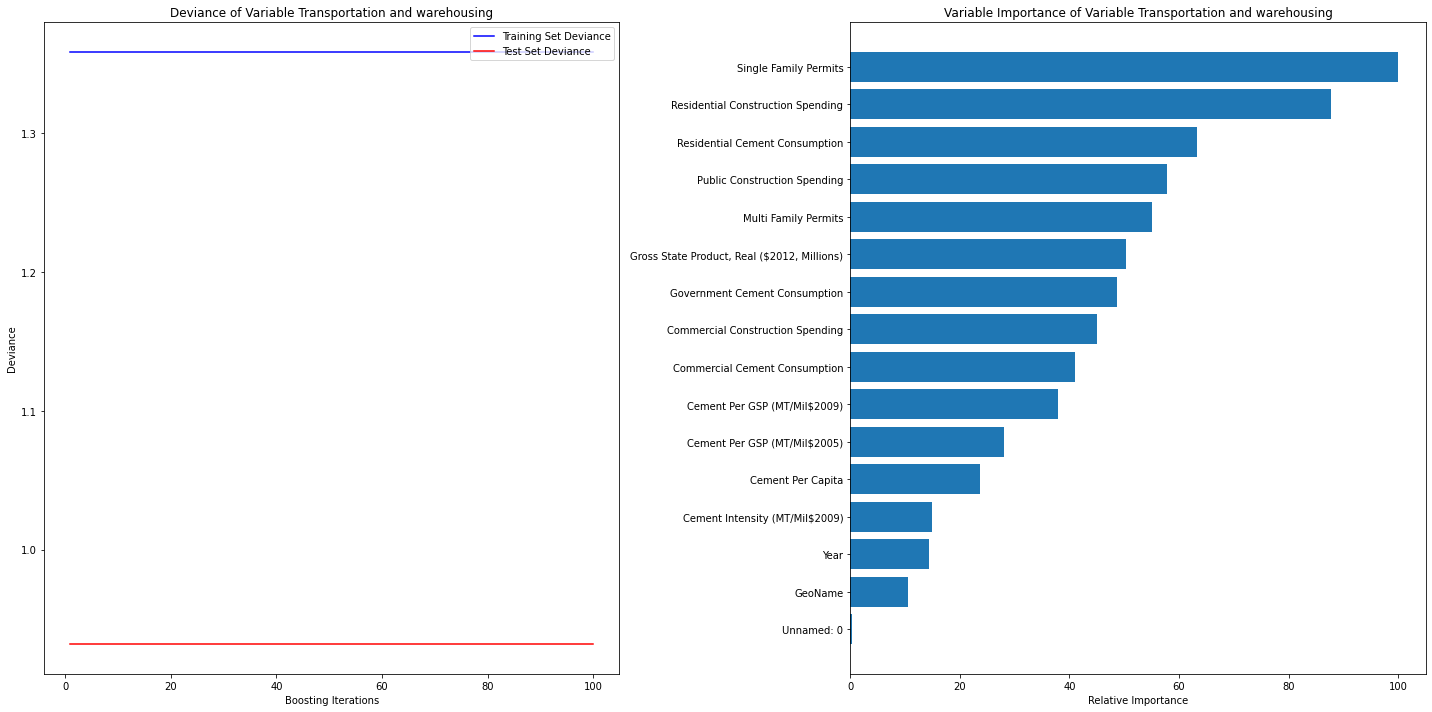

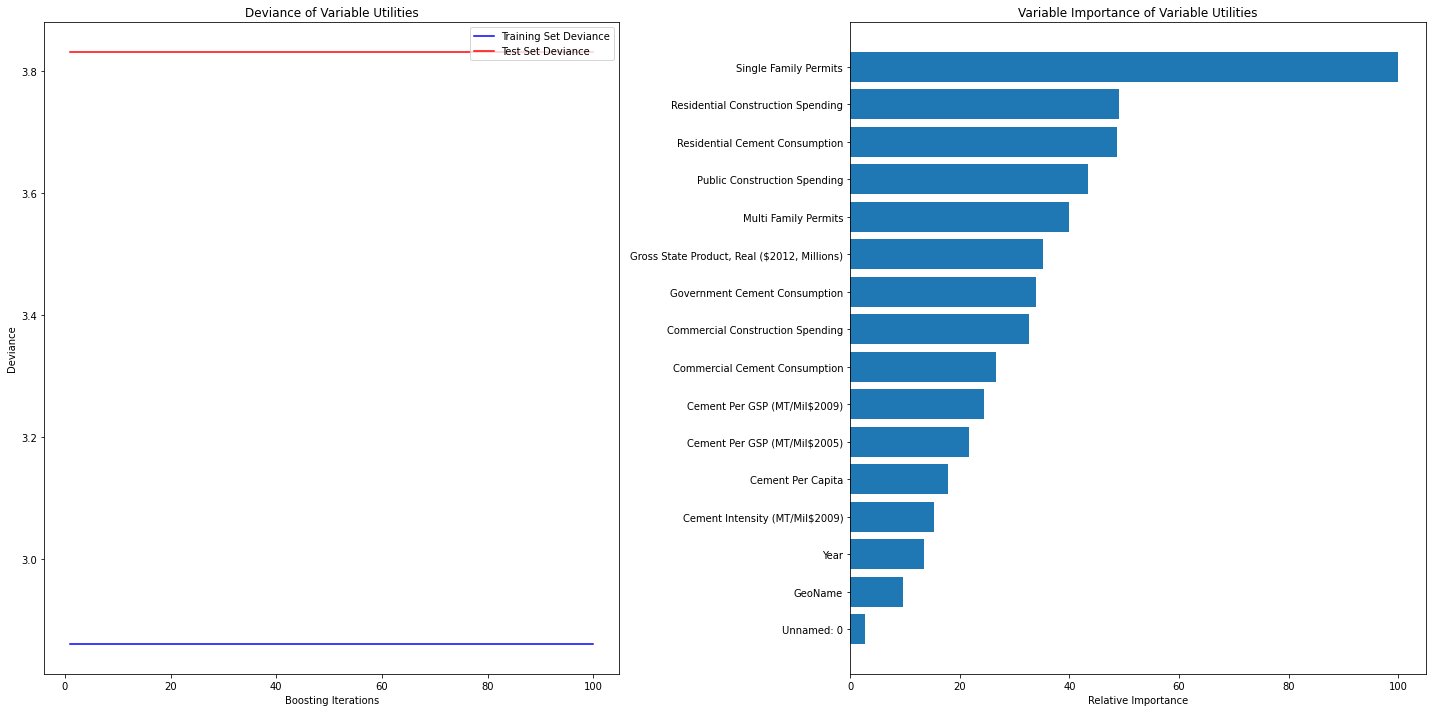

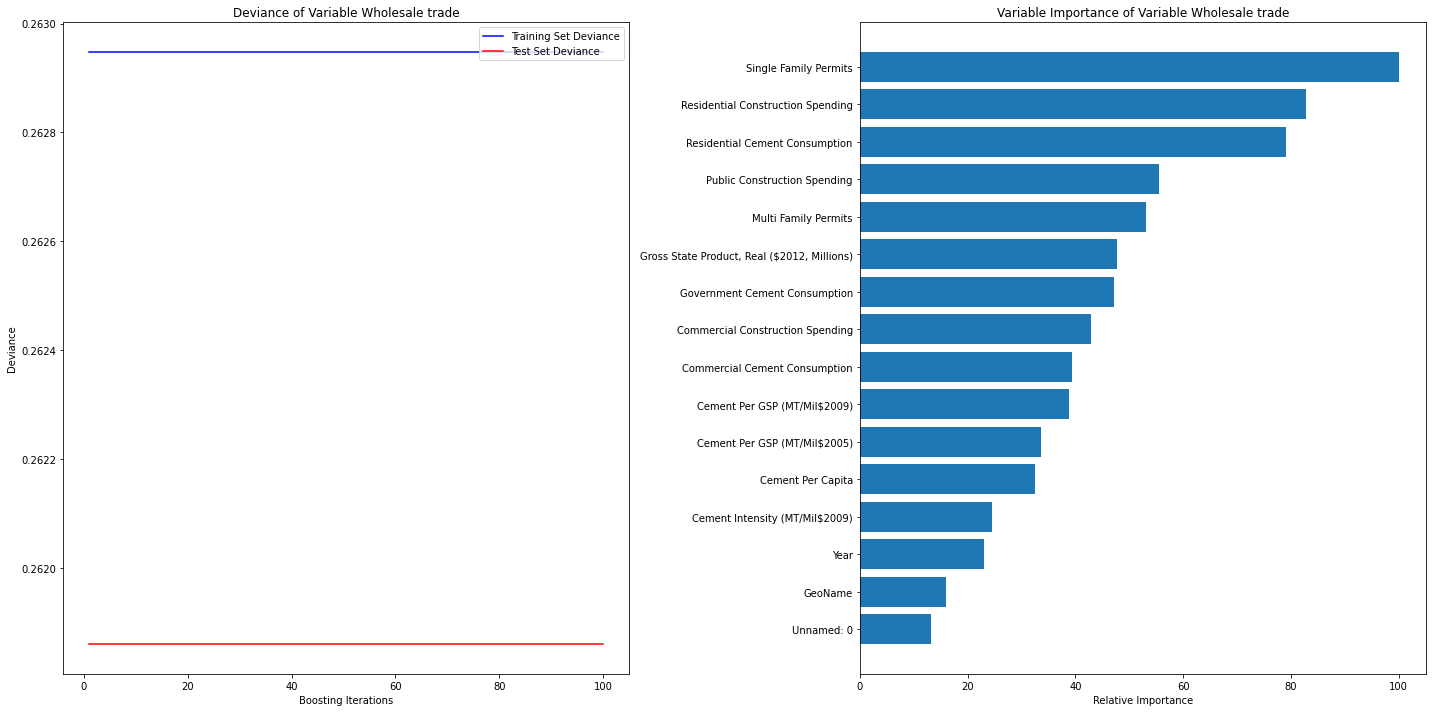

In [0]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#var=['Cement Per Capita','Commercial Construction Spending',"Unemployment Rate (%)",'Gross State Product, Real ($2012, Millions)','Transportation and utilities','Transportation and warehousing',]

#label="Construction"
os.chdir(grad_boost_img) ###CHANGE DIRECTORY OF IMAGES

params = {
    'n_estimators': 15,
    'max_depth': 100,
    'learning_rate': 1,
    'criterion': 'mse'
}

var=var_pca
for label in var_bed:
  df_train_var=df_train[var]
  df_train_label=df_train[label]
  df_val_var=df_val[var]
  df_val_label=df_val[label]
  
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(df_train_var, df_train_label)
  # compute test set deviance
  test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

  for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
      test_score[i] = clf.loss_(df_val_label, y_pred)

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title('Deviance of Variable {}'.format(label))
  plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
  plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations')
  plt.ylabel('Deviance')
  #axes=plt.gca()
  #axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
  feature_importance = clf.feature_importances_
# make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, df_final.columns)
  plt.xlabel('Relative Importance')
  plt.title('Variable Importance of Variable {}'.format(label))
  plt.tight_layout()

  plt.savefig("Gradient_boost_{}.png".format(label))
  plt.show()

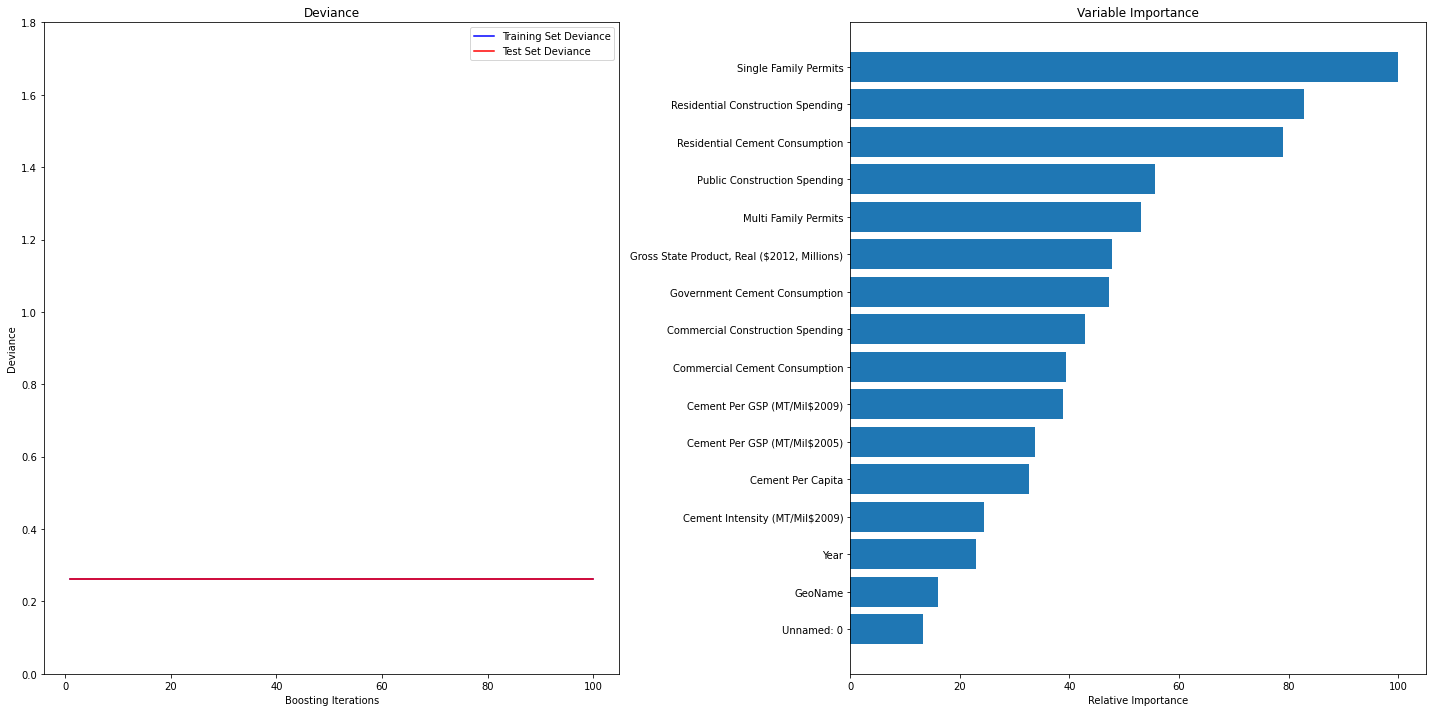

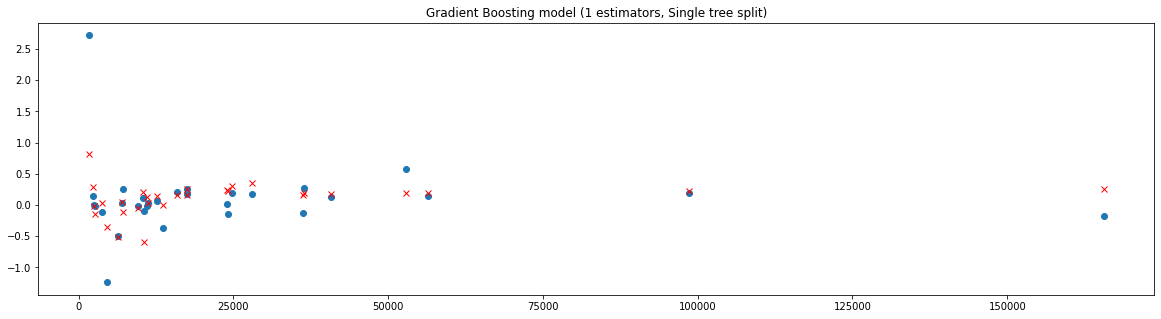

In [0]:

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(df_val_var)):
    test_score[i] = clf.loss_(df_val_label, y_pred)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
axes=plt.gca()
axes.set_ylim([0,1.8])

# #############################################################################
# Plot feature importance
#plt.figure(figsize=(10,5))
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_final.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.tight_layout()

plt.savefig("Gradient_boost.png")

#'Single Family Permits', 
#'Total Construction Spending',
plt_var='Single Family Permits'
plt.figure(figsize=(20, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(df_train_var[plt_var][0:30], df_train_label[0:30],label="Actuals")
plt.plot(df_train_var[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
plt.show()
plt.show()



In [0]:
mean_squared_error(df_val_label,clf.predict(df_val_var))

1.3669879710403323

In [0]:
df_final.describe()

,Year,Cement Intensity (MT/Mil$2009),Cement Per Capita,Cement Per GSP (MT/Mil$2005),Cement Per GSP (MT/Mil$2009),Commercial Cement Consumption,Commercial Construction Spending,Government Cement Consumption,"Gross State Product, Real ($2012, Millions)",Multi Family Permits,Public Construction Spending,Residential Cement Consumption,Residential Construction Spending,Single Family Permits,Total Construction Spending,Total Portland Cement,Unemployment Rate (%),Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting",All industry total (percent change),"Arts, entertainment, and recreation","Arts, entertainment, recreation, accommodation, and food services",Construction,Durable goods manufacturing,Educational services,"Educational services, health care, and social assistance",Finance and insurance,"Finance, insurance, real estate, rental, and leasing",Government and government enterprises,Health care and social assistance,Information,Management of companies and enterprises,Manufacturing,Manufacturing and information,"Mining, quarrying, and oil and gas extraction",Natural resources and mining,Nondurable goods manufacturing,Other services (except government and government enterprises),Private goods-producing industries 2/,Private industries,Private services-providing industries 3/,Professional and business services,"Professional, scientific, and technical services",Real estate and rental and leasing,Retail trade,Trade,Transportation and utilities,Transportation and warehousing,Utilities,Wholesale trade
count,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,5.060900e+04,50609.000000,5.060900e+04,5.060900e+04,50609.000000,50609.000000,5.060900e+04,50609.000000,50609.000000,50609.000000,5.060900e+04,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.00000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000
mean,2010.000000,101.345094,0.360144,4.394885,7.535277,3.862020e+05,7196.935972,1.428542e+06,3.914353e+05,10163.049141,9228.274242,7.914524e+05,10807.247478,25864.373906,27232.457693,2.789168e+06,0.057861,0.022663,0.062928,0.357163,1.989982,0.007376,0.032594,-0.041617,0.200609,0.005520,0.132119,0.000194,0.384075,0.014947,0.126756,0.089473,0.058117,0.25835,0.353644,0.230050,0.583577,0.066487,-0.020221,0.830641,1.974799,1.152013,0.188679,0.070996,0.384756,0.085553,0.194279,0.173652,0.069198,0.102101,0.106969
std,4.899028,28.907796,0.166025,0.743154,3.090623,5.596846e+05,7338.321476,1.724008e+06,3.777490e+05,14260.756760,9927.686730,1.001450e+06,11678.248957,33334.441134,27806.673440,3.454622e+06,0.019360,0.352486,0.413134,6.193073,9.585936,0.325284,0.435669,1.267984,2.326264,0.130677,0.476857,0.941190,1.761938,0.953839,0.460756,0.601292,0.565773,3.79602,3.864739,4.695259,7.622561,3.036626,0.214480,8.923338,9.511503,3.291935,0.813664,0.420975,1.451930,0.583349,0.813561,2.124305,1.152818,1.766299,0.549507
min,2002.000000,29.259506,0.087759,2.807331,0.992881,2.626890e+03,217.634741,1.786717e+04,2.445540e+04,0.000000,412.317479,8.911704e+03,362.313348,112.000000,1470.482770,9.249267e+04,0.023852,-13.220000,-18.950000,-63.290000,-89.500000,-20.790000,-13.120000,-34.780000,-53.660000,-8.170000,-17.350000,-33.610000,-34.880000,-34.970000,-17.350000,-23.660000,-17.390000,-89.64000,-89.640000,-53.040000,-62.980000,-89.670000,-6.740000,-89.590000,-89.460000,-36.340000,-18.570000,-13.850000,-30.480000,-26.940000,-26.910000,-35.230000,-21.040000,-35.870000,-9.820000
25%,2006.000000,79.715588,0.236551,3.132769,5.259425,1.091047e+05,2685.791567,6.257517e+05,1.386579e+05,2377.000000,3560.751771,2.405309e+05

(array([4.0000e+00, 2.1000e+01, 1.2764e+04, 3.7782e+04, 2.6000e+01,
        8.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-34.78 , -23.309, -11.838,  -0.367,  11.104,  22.575,  34.046,
         45.517,  56.988,  68.459,  79.93 ]),
 <a list of 10 Patch objects>)

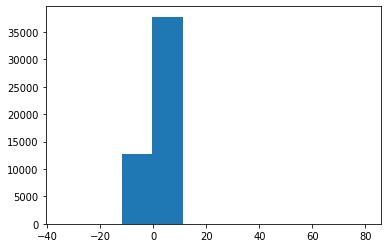

In [0]:
plt.hist(df_final[label])

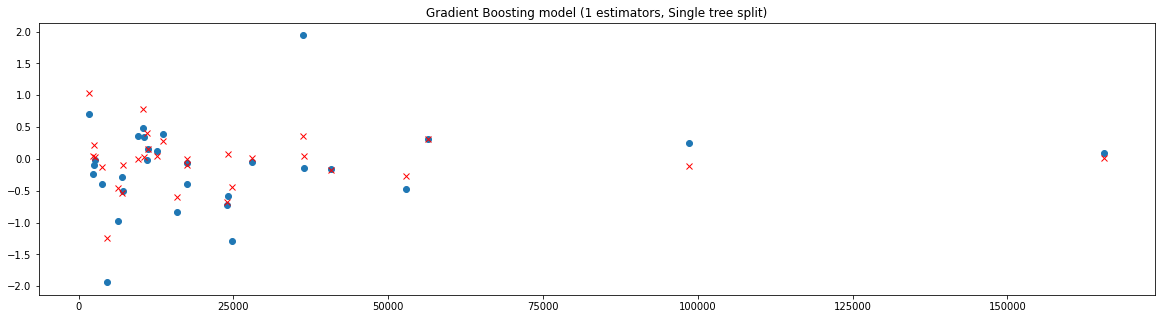

In [0]:

#'Single Family Permits', 
#'Total Construction Spending',
plt_var='Single Family Permits'
plt.figure(figsize=(20, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(df_train_var[plt_var][0:30], df_train_label[0:30],label="Actuals")
plt.plot(df_train_var[plt_var][0:30], clf.predict(df_train_var[0:30]),'x',color='r',label="Prediction")
plt.show()

In [0]:
 df_pca_test=pd.DataFrame()
for var in var_pca:
  df_pca_test[var]=df_pca[var].replace('g',np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan).replace("--",np.nan)*1 #replaces char str with numeric or nan
  df_pca_test[var]=df_pca_test[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)*1 ###if np.float(x) is a string then returns np.nan, else it returns x
  df_pca_test[var]=df_pca_test[var].ffill() ##Forward fills data if NA
  df_pca_test[var]=df_pca_test[var].bfill()

df_pca_val=df_pca[var_pca][df_pca["Year"]>2000] ###CREATE PREDICTIONS
results=clf.predict(df_pca_test)
list(results)[1:10]

[-0.11305555555555556,
 -0.11305555555555556,
 0.05666666666666666,
 -0.003580246913580258,
 -0.09106666666666666,
 -0.05958333333333334,
 -0.1021333333333333,
 0.053797468354430375,
 0.0710126582278481]

In [0]:
var_bed

['Accommodation and food services',
 'Administrative and support and waste management and remediation services',
 'Agriculture, forestry, fishing and hunting',
 'All industry total (percent change)',
 'Arts, entertainment, and recreation',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Construction',
 'Durable goods manufacturing',
 'Educational services',
 'Educational services, health care, and social assistance',
 'Finance and insurance',
 'Finance, insurance, real estate, rental, and leasing',
 'Government and government enterprises',
 'Health care and social assistance',
 'Information',
 'Management of companies and enterprises',
 'Manufacturing',
 'Manufacturing and information',
 'Mining, quarrying, and oil and gas extraction',
 'Natural resources and mining',
 'Nondurable goods manufacturing',
 'Other services (except government and government enterprises)',
 'Private goods-producing industries',
 'Private industries',
 'Private services-providing indus

In [0]:

"""for label in var_bed:
  df_train_var=df_train[var]
  df_train_label=df_train[label]
  df_val_var=df_val[var]
  df_val_label=df_val[label]"""

label='Utilities'
df_train_label=df_train[label]

21899    0.37
7274     0.25
15439   -0.24
32004   -0.28
18158   -0.03
         ... 
27886    0.23
6343     0.03
10815    0.28
32449    0.03
26452    0.02
Name: Utilities, Length: 40487, dtype: float64

In [0]:
model = tf.keras.models.Sequential([

  tf.keras.layers.LSTM(64, input_shape=(16,1),return_sequences=True),
#  tf.keras.layers.LSTM(64, return_sequences=True),
#  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation='relu')
  #tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

df_train_array=np.array(df_train[var_pca])
df_train_label_array=np.array(df_train_label)

ds=tf.expand_dims(df_train_array,axis=-1)

#ds = ds.map(lambda window: (window[:-1], window[-1:])) #All but the last entry; The last entry
#ds = ds.batch(10).prefetch(1)
history = model.fit(ds,df_train_label,epochs=10)


Train on 40487 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
df_train_label

21899   -0.11
7274     0.26
15439    0.13
32004    0.14
18158   -0.15
         ... 
27886    0.47
6343     0.27
10815    0.68
32449    0.01
26452    0.14
Name: Wholesale trade, Length: 40487, dtype: float64

In [0]:
df_train_var

,Cement Intensity (MT/Mil$2009),Cement Per Capita,Cement Per GSP (MT/Mil$2005),Cement Per GSP (MT/Mil$2009),Commercial Cement Consumption,Commercial Construction Spending,Government Cement Consumption,"Gross State Product, Real ($2012, Millions)",Multi Family Permits,Public Construction Spending,Residential Cement Consumption,Residential Construction Spending,Single Family Permits,Total Construction Spending,Total Portland Cement,Unemployment Rate (%)
21899,71.721579,0.254557,4.832085,7.679604,52201.843525,1885.899542,5.390761e+05,98727.7,589.0,6242.544259,1.125887e+05,2442.846927,3744.0,10571.290729,7.581897e+05,0.099955
7274,140.571453,0.736770,4.832085,14.291575,117755.677258,1841.180315,8.768056e+05,91387.2,2152.0,4709.426995,2.050521e+05,2740.518438,7115.0,9291.125748,1.306067e+06,0.031273
15439,103.739938,0.349170,4.832085,7.483327,657458.490302,9711.208224,2.304443e+06,534358.7,9461.0,10796.849214,9.599612e+05,18038.149070,40788.0,38546.206508,3.998781e+06,0.062520
32004,64.213284,0.189981,4.832085,4.781030,17169.494811,441.353895,3.783862e+04,24455.4,635.0,482.807057,5.874587e+04,896.677240,2276.0,1820.838192,1.169220e+05,0.040011
18158,89.144773,0.380076,4.832085,9.575561,225718.218687,3789.627952,7.726680e+05,181385.9,6694.0,6974.971234,6.498969e+05,8719.120058,24065.0,19483.719243,1.736872e+06,0.044891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,97.754359,0.453447,4.832085,11.626042,67947.500808,1644.762848,2.875754e+05,58703.1,2227.0,1353.307694,2.539227e+05,3983.559102,10398.0,6981.629645,6.824847e+05,0.030511
6343,124.845858,0.254836,4.832085,5.658022,147901.272160,3684.101932,9.430382e+05,272773.5,6878.0,2959.747307,3.816852e+05,5718.262586,8545.0,12362.111825,1.543358e+06,0.061264
10815,105.312927,0.359918,4.832085,6.616922,763517.009488,10114.853512,2.240641e+06,685896.7,18909.0,10708.018264,1.415175e+06,22272.741014,49084.0,43095.612789,4.538525e+06,0.056769
32449,71.511186,0.244991,4.832085,5.307742,106133.574490,3935.288589,5.008090e+05,173955.1,4401.0,3889.898270,2.846903e+05,5086.202961,7793.0,12911.389821,9.233088e+05,0.065789


In [0]:
df_train[0]

KeyError: ignored

In [0]:
# Poisson regression code
import statsmodels.api as sm

exog, endog = sm.add_constant(df_train_var), df_train_label
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log))
x_new=df_train_var[:,2:3]
res = mod.fit(x_new,df_train_label)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """


TypeError: ignored

In [0]:
####CREATE THE DATASET.  CLEAN. TRANSPOSE. FILTER DATASETS WITH OIL&GAS>20 MIL IN AT LEAST 9 YEARS OUT OF 16.
years=9 #Number of years 
amt=5

msa_files=pd.DataFrame()
for file in input_files:
    msa_file=pd.read_csv(file)
    keep_indices=[0,1,4,5,9,10,14,34,50,56,65,78]
    column_keep=["Description", "2001","2002",'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']
    msa_file=msa_file[column_keep].iloc[keep_indices,:]
    msa_file_T=pd.DataFrame(msa_file.T[1:]).reset_index()
    msa_file_T=msa_file_T.rename(columns={"index":"Year",0:"All industries",1:"Private industries",4:"Forestry,fishing",5:"Oil_gas",9:"Utilities",
                                          10:"Manufacturing",14:"Non-metal miner manufac",34:"Retail",
                                          50:"Finance_Ins",56:"Real_estate",65:"Education",78:"Government"})*1
    for var in msa_file_T.columns:
        msa_file_T[var]=msa_file_T[var].replace("(D)",np.NaN).replace("(NA)",np.nan).replace("(L)",np.nan)*1
        msa_file_T[var]=msa_file_T[var].apply(lambda x: np.nan if isinstance(np.float(x),str) else x)
        #####CREATE AN INDICATOR IF THERE'S DATA IN OIL & GAS FIELD
        if var=="Oil_gas":
          msa_file_T["dset_keep"]=np.where(msa_file_T["Oil_gas"].astype('float')>amt,1,0) ###ONLY YEARS WITH $20 MILLION OUTPUT
        msa_file_T[var]=msa_file_T[var].fillna(method='ffill')
        msa_file_T[var]=msa_file_T[var].fillna(method='bfill')
        msa_file_T[var]=msa_file_T[var].replace(np.nan,0)
    #CREATE A FILTER WHERE THERE'S MORE THAN 9 YEARS OF DATA OUT OF 16 YEARS FOR OIL & GAS WITH $20 MILLION OUTPUT
    if msa_file_T["dset_keep"].astype('float').sum()>years:
      msa_files=pd.concat([msa_files,msa_file_T],axis=0)






In [0]:

msa_list=[]
for file in input_files:
  msa_list.append(file[7:])
os.chdir(base_dir)
msa_list=pd.DataFrame(msa_list)
msa_list.to_csv("MSA_list.csv")

os.chdir(msa_dir)

In [0]:
msa_files.shape
os.chdir(base_dir)
msa_files.to_excel("msa_files.xlsx")

os.chdir(msa_dir)

In [0]:
msa_files.columns

Index(['Year', 'All industries', 'Private industries', 'Forestry,fishing',
       'Oil_gas', 'Utilities', 'Manufacturing', 'Non-metal miner manufac',
       'Retail', 'Finance_Ins', 'Real_estate', 'Education', 'Government',
       'dset_keep'],
      dtype='object')

In [0]:

USA_file=USA_gdp[column_keep].iloc[0:3]
USA_file_T=USA_file.T[1:].reset_index()
USA_file_T=USA_file_T.rename(columns={"index":"Year",0:"GDP Growth",1:"All industries_USA",2:"Private industries_USA"})
print(USA_file_T)

    Year GDP Growth All industries_USA Private industries_USA
0   2001      -0.01          9551195.1              8381322.4
1   2002     0.0174          9872503.4              8632372.4
2   2003     0.0186         10346834.9              9037613.8
3   2004      0.038           11033711              9650075.6
4   2005      0.035         11793460.1             10342186.4
5   2006     0.0286         12488192.4             10966300.6
6   2007     0.0188         13058074.8             11453293.7
7   2008     -0.014         13233095.5             11555119.5
8   2009    -0.0207         12959750.1             11231707.8
9   2010     0.0256         13421681.4             11635874.4
10  2011     0.0155         13885695.4               12076405
11  2012     0.0255         14485166.1               12652793
12  2013     0.0184           14966839               13111140
13  2014     0.0245           15628087               13723928
14  2015     0.0288         16358497.6             14391365.4
15  2016

In [0]:
MSA_files_complete=USA_file_T.merge(msa_files,left_on="Year",right_on="Year").set_index("Year")
MSA_files_complete["GDP Growth"]=MSA_files_complete["GDP Growth"].replace("(","-").replace(")","")
MSA_files_complete=MSA_files_complete.astype('float')

In [0]:
MSA_files_complete.head

<bound method NDFrame.head of       GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
2001     -0.0100           9551195.1  ...        0.0                    1
2001     -0.0100           9551195.1  ...        1.0                    1
...          ...                 ...  ...        ...                  ...
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0
2017      0.0222          17547901.6  ...        1.0                    0

[2040 r

In [0]:
def feature_engineering(dset_in):
    dset_out=pd.DataFrame()
    for col in dset_in.columns:
        dset_out[col]=dset_in[col]
        dset_out[col+"_log"]=dset_in[col].apply(lambda x: np.log(x+1))
        dset_out[col+"_squared"]=dset_in[col].apply(lambda x: np.square(x+1))
    return dset_out


def percent_of_msa_econ(dset_in):
  dset_out=pd.DataFrame()
  for col in dset_in.columns:
    if col !="All industries":
      #dset_out[col]=dset_in[col]
      dset_out[col+"_pct"]=[dset_in[col].iloc[i]/dset_in["All industries"].iloc[i] for i in range(len(dset_in["All industries"]))]
  return dset_out.astype(float)


In [0]:
MSA_files_complete["Recession_indicator"]=0
recession_years=['2001','2008','2009']
"""for i in range(len(MSA_files_complete)):
    if MSA_files_complete["Year"].iloc[i] in recession_years:
        MSA_files_complete["Recession_indicator"].iloc[i]=1
    else:
        MSA_files_complete["Recession_indicator"].iloc[i]=0"""
MSA_files_complete["Recession_indicator"]=np.where(MSA_files_complete.index.isin(recession_years),1,0) ####Much faster than doing a loop
        
pred_var=["All industries","Private industries","Forestry,fishing","Oil_gas",'Non-metal miner manufac',"Utilities","Manufacturing","Retail","Finance_Ins","Real_estate","Education","Government"]
label_var=["Recession_indicator"]

df_var=MSA_files_complete[pred_var].astype(float)
df_label=MSA_files_complete[label_var]
####convert it to numeric matrix
df_var_features=feature_engineering(df_var)
df_var_mat=np.matrix(df_var_features,float)
df_label_mat=np.matrix(df_label,float)




In [0]:
len(df_var_features.columns)

36

In [0]:
print(MSA_files_complete.head())

      GDP Growth  All industries_USA  ...  dset_keep  Recession_indicator
Year                                  ...                                
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1
2001       -0.01           9551195.1  ...        0.0                    1
2001       -0.01           9551195.1  ...        1.0                    1

[5 rows x 17 columns]


In [0]:
#####Sklearn doesn't return p-values of coefficients
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection
clf=LogisticRegression(random_state=0,solver='lbfgs').fit(df_var,df_label)
p_value=sklearn.feature_selection.f_regression(df_var,df_label)
clf.coef_



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.19132447e-04,  1.65104967e-04, -5.16736789e-04,
        -1.72669383e-04, -8.15980396e-04,  9.55167246e-05,
         6.37646245e-04, -2.05086771e-03,  3.67783229e-04,
         2.09203530e-04, -2.50417565e-04,  6.41444836e-05]])

In [0]:
#####using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete import discrete_model


discrete_model.Logit(df_label_mat,df_var_mat)
results=sm.Logit(df_label_mat,df_var_mat)
results_f=results.fit()
print(results_f.summary())

Optimization terminated successfully.
         Current function value: 0.448014
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2005
Method:                           MLE   Df Model:                           34
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.03860
Time:                        15:54:48   Log-Likelihood:                -913.95
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                 0.0001030
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.002     -1.611      0.107      -0.007       0.001
x2            -1.8172      1.

In [0]:
###########CORRELATION BETWEEN INDIVIDUAL INDUSTRIES & ALL INDUSTRIES
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt



In [0]:
######################################Percent of Industry in Economy

df_var_pct=percent_of_msa_econ(df_var)
df_var_pct_mat=np.matrix(df_var_pct,"float")



for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["All industries_USA"]))

Private industries_pct  = (0.07857607971012692, 0.0003818596064877735)
Forestry,fishing_pct  = (0.03587423931726527, 0.10526728617437976)
Oil_gas_pct  = (0.02724675517189615, 0.21865561114826834)
Non-metal miner manufac_pct  = (-0.07716121604880719, 0.0004863635416020818)
Utilities_pct  = (-0.032022712426295, 0.14822387315109725)
Manufacturing_pct  = (-0.3299386510953362, 5.275678246587498e-53)
Retail_pct  = (-0.045056924159328195, 0.04186664284876076)
Finance_Ins_pct  = (0.014912346121684825, 0.5008448783076218)
Real_estate_pct  = (0.013942160058176493, 0.5291125927832199)
Education_pct  = (0.001079475244547311, 0.9611375778615656)
Government_pct  = (-0.08229962918802992, 0.00019827031834943032)


In [0]:
################CORRELATION BETWEEN INDUSTRY PERCENTAGE OF MSA'S ECONOMY AND USA GDP GROWTH
for i in df_var_pct.columns:
  print(i," =",pearsonr(df_var_pct[i],MSA_files_complete["GDP Growth"]))

Private industries_pct  = (0.03214352496516699, 0.14669880332275434)
Forestry,fishing_pct  = (0.007664066073518147, 0.7293796338339895)
Oil_gas_pct  = (-0.009735010845500335, 0.6603457102761396)
Non-metal miner manufac_pct  = (0.0019329586461899484, 0.9304717828892327)
Utilities_pct  = (-0.00822217687775451, 0.7105299450089176)
Manufacturing_pct  = (0.001562047391223188, 0.9437887014256673)
Retail_pct  = (0.0573875713852562, 0.009527130742256171)
Finance_Ins_pct  = (0.01591392031371679, 0.4725237675937108)
Real_estate_pct  = (0.006526605923455836, 0.7682952701574847)
Education_pct  = (-0.009094727081901418, 0.6814154206563484)
Government_pct  = (-0.0327595032423046, 0.1391088920369939)


In [0]:
results_pct=sm.Logit(df_label_mat,df_var_pct_mat)
results_pct_f=results_pct.fit()
print(results_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.459813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2029
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.01328
Time:                        15:56:28   Log-Likelihood:                -938.02
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                  0.004908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6146      0.422     -3.827      0.000      -2.441      -0.788
x2            -2.7214      6.

In [0]:
df_oilgas_pct=feature_engineering(df_var_pct[["Oil_gas_pct","Retail_pct","Education_pct","Utilities_pct"]])
df_oil_gas_pct_mat=np.matrix(df_oilgas_pct,"float")



print(df_oilgas_pct.head())


   Oil_gas_pct  Oil_gas_pct_log  ...  Utilities_pct_log  Utilities_pct_squared
0     0.066650         0.064523  ...           0.021814               1.044593
1     0.208344         0.189251  ...           0.011113               1.022475
2     0.003812         0.003805  ...           0.012296               1.024897
3     0.005928         0.005911  ...           0.001218               1.002439
4     0.003807         0.003800  ...           0.015456               1.031394

[5 rows x 12 columns]


In [0]:
results_oil_gas_pct=sm.Logit(df_label_mat,df_oil_gas_pct_mat[:,:6])
results_oil_gas_pct_f=results_oil_gas_pct.fit()
print(results_oil_gas_pct_f.summary())

Optimization terminated successfully.
         Current function value: 0.464881
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2040
Model:                          Logit   Df Residuals:                     2034
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.002399
Time:                        15:56:28   Log-Likelihood:                -948.36
converged:                       True   LL-Null:                       -950.64
Covariance Type:            nonrobust   LLR p-value:                    0.4717
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            90.7359    156.583      0.579      0.562    -216.160     397.632
x2           -58.0405     97.

In [0]:
from matplotlib import pyplot as plt

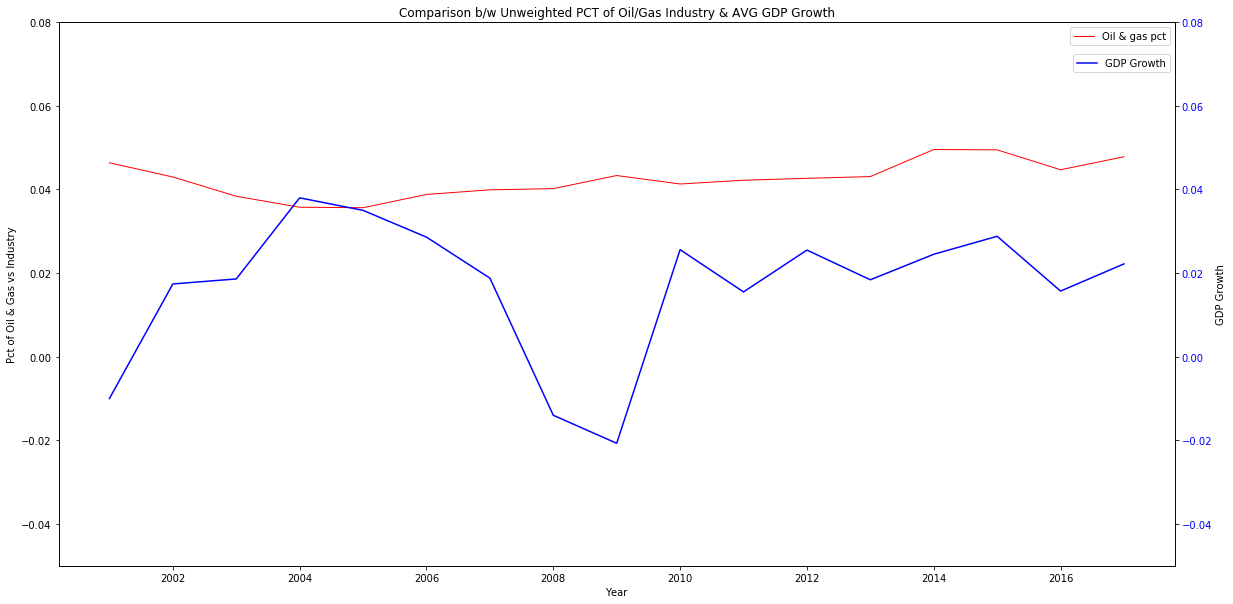

In [0]:
color = 'red'
fig1=df_var_pct["Oil_gas_pct"].groupby(df_var.index).mean()
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label='Oil & gas pct')
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label='GDP Growth')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title("Comparison b/w Unweighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax1.set_ylim([-.05,.08])
ax2.set_ylim([-.05,.08])
plt.show()

In [0]:
wm = lambda x: np.average(x, weights=df_var_pct.loc[x.index.unique(),"Oil_gas"])

# Define a dictionary with the functions to apply for a given column:
f = { 'Oil_gas_pct': {'weighted_mean' : wm} }

# Groupby and aggregate with your dictionary:
fig1=df_var_pct.groupby(df_var_pct.index).agg(f)
fig2=MSA_files_complete["GDP Growth"].groupby(MSA_files_complete.index).mean()

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(2001,2018),fig1,color=color,linewidth=1.0,label="Weighted Oil & Gas Pct ")
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
color2='blue'
ax2.plot(np.arange(2001,2018),fig2,color=color2,label="GDP Growth")
plt.title("Comparison b/w Weighted PCT of Oil/Gas Industry & AVG GDP Growth")
ax1.set_ylabel("Pct of Oil & Gas vs Industry")
ax2.set_ylabel("GDP Growth")
ax1.legend(bbox_to_anchor = [1, 1])
ax2.legend(bbox_to_anchor = [1, .95])

ax2.set_ylim([-.05,.08])

plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: ignored

In [0]:
for i in fig1.columns:
  print(pearsonr(fig1[i],fig2))

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [0]:
df_var_pct